# Title of ML Project: Sensor-Based Machine Learning Model for Room Occupancy Estimation

# Name : Aswin kumar T S


# Organization: Entri Elevate   

## link of dataset: https://archive.ics.uci.edu/dataset/864/room+occupancy+estimation.

### Project Overview:

### This project aims to develop a machine learning regression model to estimate room occupancy using sensor data. The dataset includes temperature, light, sound, CO2 levels, and motion sensor readings. By analyzing these features, the model will provide accurate occupancy predictions, enabling applications in energy efficiency, space optimization, and smart building automation.
### Objective: To develop a machine learning regression model that accurately predicts room occupancy count using sensor data.
### Date – The recorded date of the observation.
### Time – The recorded time of the observation.
### 2. Temperature Sensor Readings
### S1_Temp – Temperature reading from sensor 1.
### S2_Temp – Temperature reading from sensor 2.
### S3_Temp – Temperature reading from sensor 3.
### S4_Temp – Temperature reading from sensor 4.
### 3. Light Sensor Readings
### S1_Light – Light intensity recorded by sensor 1.
### S2_Light – Light intensity recorded by sensor 2.
### S3_Light – Light intensity recorded by sensor 3.
### S4_Light – Light intensity recorded by sensor 4.
### 4. Sound Sensor Readings
### S1_Sound – Sound level detected by sensor 1.
### S2_Sound – Sound level detected by sensor 2.
### S3_Sound – Sound level detected by sensor 3.
### S4_Sound – Sound level detected by sensor 4.
### 5. CO2 Sensor Readings
### S5_CO2 – Carbon dioxide (CO2) concentration detected by sensor 5.
### Room_Occupancy_Count – Number of people present in the room (Target variable for regression).  

## Importing libraries and Data collection.

In [51]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
import warnings
warnings.filterwarnings('ignore')

In [55]:
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.feature_selection import SelectKBest,f_regression,RFE
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR


In [57]:
data = pd.read_csv('Occupancy_Estimation.csv')

In [59]:
df = pd.DataFrame(data)

In [61]:
df.head(6)

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1
5,2017/12/22,10:52:14,25.00,24.81,24.56,25.44,121,34,54,40,0.13,0.06,0.06,0.07,390,0.165385,0,0,1


In [63]:
df.tail(6)

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
10123,2018/01/11,08:57:36,25.06,25.13,24.69,25.25,6,7,33,22,0.08,0.05,0.06,0.09,345,0.0,0,0,0
10124,2018/01/11,08:58:07,25.06,25.13,24.69,25.31,6,7,33,22,0.09,0.04,0.06,0.08,345,0.0,0,0,0
10125,2018/01/11,08:58:37,25.06,25.06,24.69,25.25,6,7,34,22,0.07,0.05,0.05,0.08,345,0.0,0,0,0
10126,2018/01/11,08:59:08,25.13,25.06,24.69,25.25,6,7,34,22,0.11,0.05,0.06,0.08,345,0.0,0,0,0
10127,2018/01/11,08:59:39,25.13,25.06,24.69,25.25,6,7,34,22,0.08,0.08,0.10,0.08,345,0.0,0,0,0
10128,2018/01/11,09:00:09,25.13,25.06,24.69,25.25,6,7,34,22,0.08,0.05,0.06,0.08,345,0.0,0,0,0


In [65]:
df.describe()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
count,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.00000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000,10129.000000
mean,25.454012,25.546059,25.056621,25.754125,25.445059,26.01629,34.248494,13.220259,0.168178,0.120066,0.158119,0.103840,460.860401,-0.004830,0.090137,0.079574,0.398559
std,0.351351,0.586325,0.427283,0.356434,51.011264,67.30417,58.400744,19.602219,0.316709,0.266503,0.413637,0.120683,199.964940,1.164990,0.286392,0.270645,0.893633
min,24.940000,24.750000,24.440000,24.940000,0.000000,0.00000,0.000000,0.000000,0.060000,0.040000,0.040000,0.050000,345.000000,-6.296154,0.000000,0.000000,0.000000
25%,25.190000,25.190000,24.690000,25.440000,0.000000,0.00000,0.000000,0.000000,0.070000,0.050000,0.060000,0.060000,355.000000,-0.046154,0.000000,0.000000,0.000000
50%,25.380000,25.380000,24.940000,25.750000,0.000000,0.00000,0.000000,0.000000,0.080000,0.050000,0.060000,0.080000,360.000000,0.000000,0.000000,0.000000,0.000000
75%,25.630000,25.630000,25.380000,26.000000,12.000000,14.00000,50.000000,22.000000,0.080000,0.060000,0.070000,0.100000,465.000000,0.000000,0.000000,0.000000,0.000000
max,26.380000,29.000000,26.190000,26.560000,165.000000,258.00000,280.000000,74.000000,3.880000,3.440000,3.670000,3.400000,1270.000000,8.980769,1.000000,1.000000,3.000000


## Data Preprocessing

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  10129 non-null  object 
 1   Time                  10129 non-null  object 
 2   S1_Temp               10129 non-null  float64
 3   S2_Temp               10129 non-null  float64
 4   S3_Temp               10129 non-null  float64
 5   S4_Temp               10129 non-null  float64
 6   S1_Light              10129 non-null  int64  
 7   S2_Light              10129 non-null  int64  
 8   S3_Light              10129 non-null  int64  
 9   S4_Light              10129 non-null  int64  
 10  S1_Sound              10129 non-null  float64
 11  S2_Sound              10129 non-null  float64
 12  S3_Sound              10129 non-null  float64
 13  S4_Sound              10129 non-null  float64
 14  S5_CO2                10129 non-null  int64  
 15  S5_CO2_Slope       

In [69]:
df.columns

Index(['Date', 'Time', 'S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light',
       'S2_Light', 'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound',
       'S4_Sound', 'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR',
       'Room_Occupancy_Count'],
      dtype='object')

In [71]:
df.isnull().sum()

Date                    0
Time                    0
S1_Temp                 0
S2_Temp                 0
S3_Temp                 0
S4_Temp                 0
S1_Light                0
S2_Light                0
S3_Light                0
S4_Light                0
S1_Sound                0
S2_Sound                0
S3_Sound                0
S4_Sound                0
S5_CO2                  0
S5_CO2_Slope            0
S6_PIR                  0
S7_PIR                  0
Room_Occupancy_Count    0
dtype: int64

In [73]:
df.duplicated().sum()

0

In [97]:
df1.drop(columns=['Date'],inplace = True)

In [99]:
df1.drop(columns=['Time'],inplace = True)

In [101]:
c = df.corr()
c

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
S1_Temp,1.000000,0.931035,0.948807,0.855570,0.637362,0.590825,0.609264,0.196262,0.429799,0.586241,0.578183,0.370365,0.889692,0.048725,NaN,NaN,NaN
S2_Temp,0.931035,1.000000,0.909209,0.803408,0.574733,0.546394,0.546676,0.255385,0.408787,0.585289,0.554890,0.343130,0.851278,0.029108,NaN,NaN,NaN
S3_Temp,0.948807,0.909209,1.000000,0.885186,0.609604,0.584389,0.625726,0.287504,0.422882,0.552246,0.545571,0.399922,0.826191,0.018396,NaN,NaN,NaN
S4_Temp,0.855570,0.803408,0.885186,1.000000,0.621760,0.598021,0.604119,0.379479,0.384473,0.540316,0.539606,0.355441,0.678595,0.076147,NaN,NaN,NaN
S1_Light,0.637362,0.574733,0.609604,0.621760,1.000000,0.976909,0.912762,0.695799,0.693710,0.731284,0.696115,0.498444,0.575789,0.399643,NaN,NaN,NaN
S2_Light,0.590825,0.546394,0.584389,0.598021,0.976909,1.000000,0.900878,0.748839,0.677361,0.717691,0.677007,0.501795,0.545100,0.404127,NaN,NaN,NaN
S3_Light,0.609264,0.546676,0.625726,0.604119,0.912762,0.900878,1.000000,0.688233,0.630763,0.673124,0.656764,0.495601,0.573560,0.362048,NaN,NaN,NaN
S4_Light,0.196262,0.255385,0.287504,0.379479,0.695799,0.748839,0.688233,1.000000,0.446432,0.448402,0.409523,0.286788,0.210543,0.253027,NaN,NaN,NaN
S1_Sound,0.429799,0.408787,0.422882,0.384473,0.693710,0.677361,0.630763,0.446432,1.000000,0.665249,0.638273,0.568275,0.379330,0.414643,NaN,NaN,NaN
S2_Sound,0.586241,0.585289,0.552246,0.540316,0.731284,0.717691,0.673124,0.448402,0.665249,1.000000,0.741687,0.513489,0.520718,0.346171,NaN,NaN,NaN


In [83]:
numerical_columns=df.select_dtypes(include=['number'])

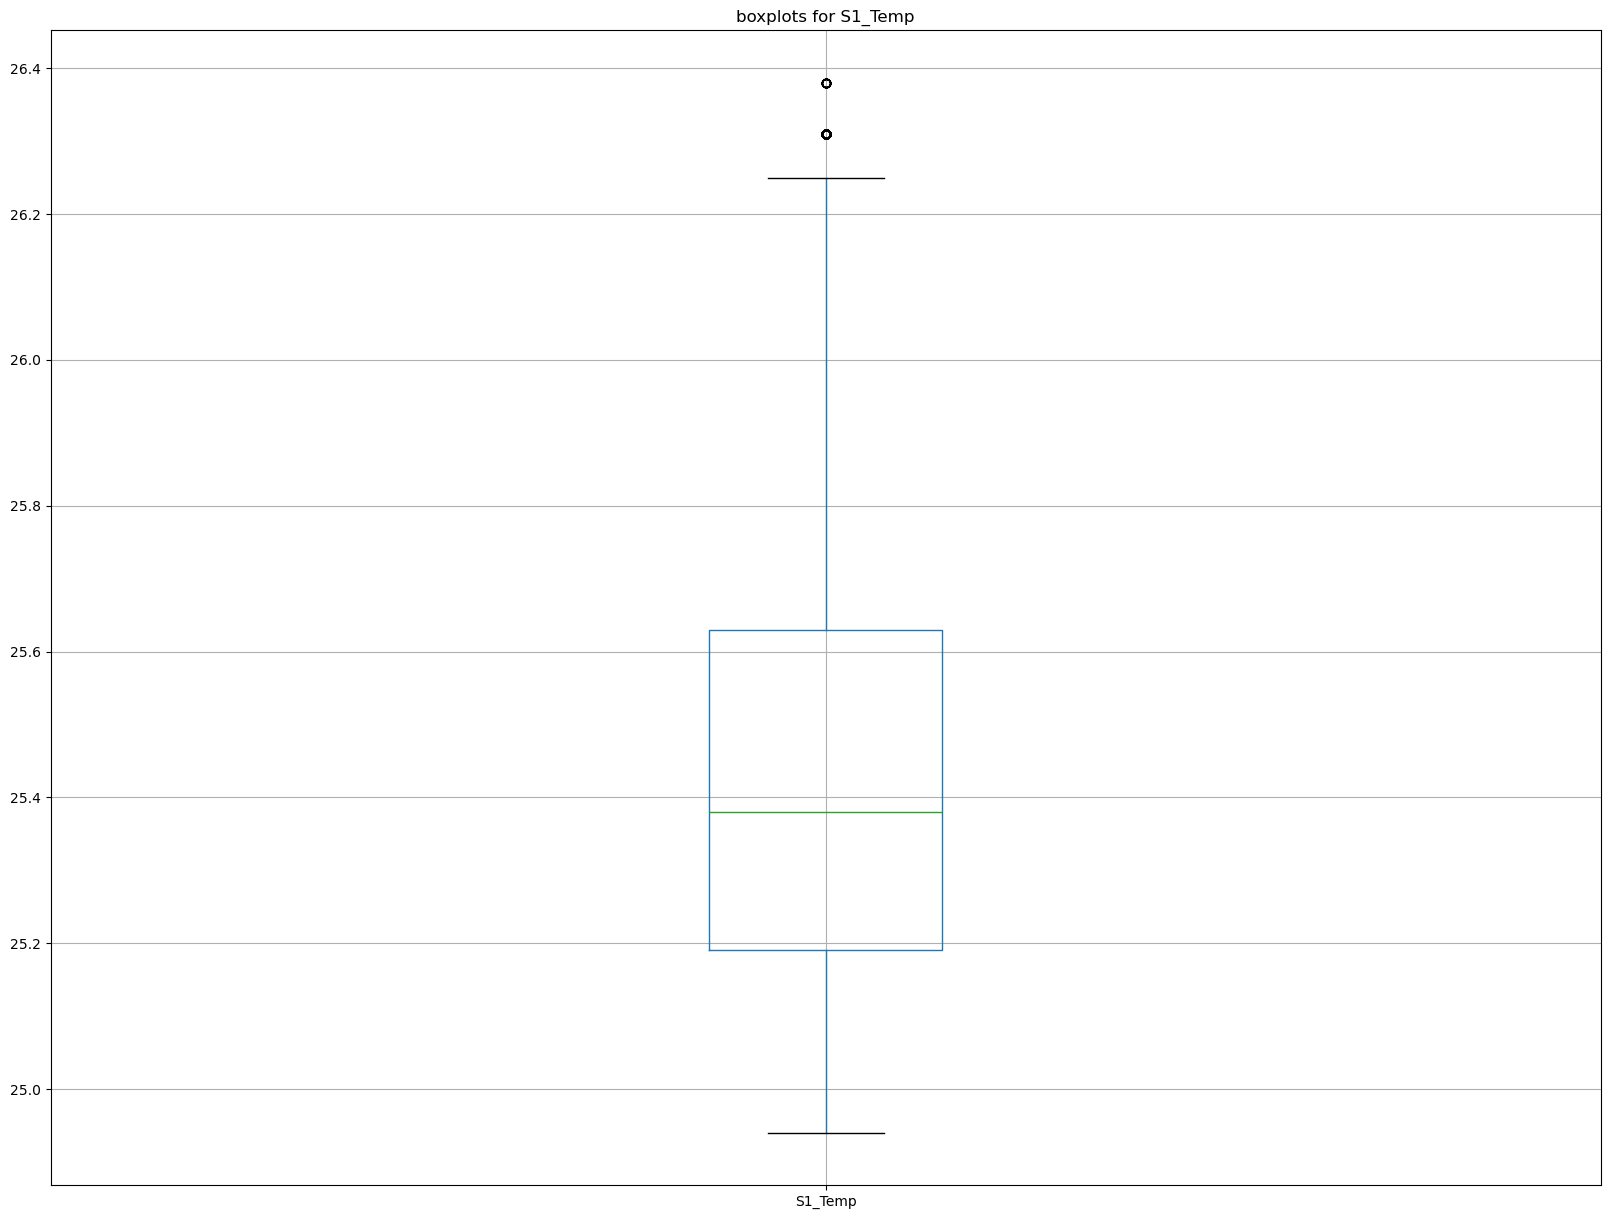

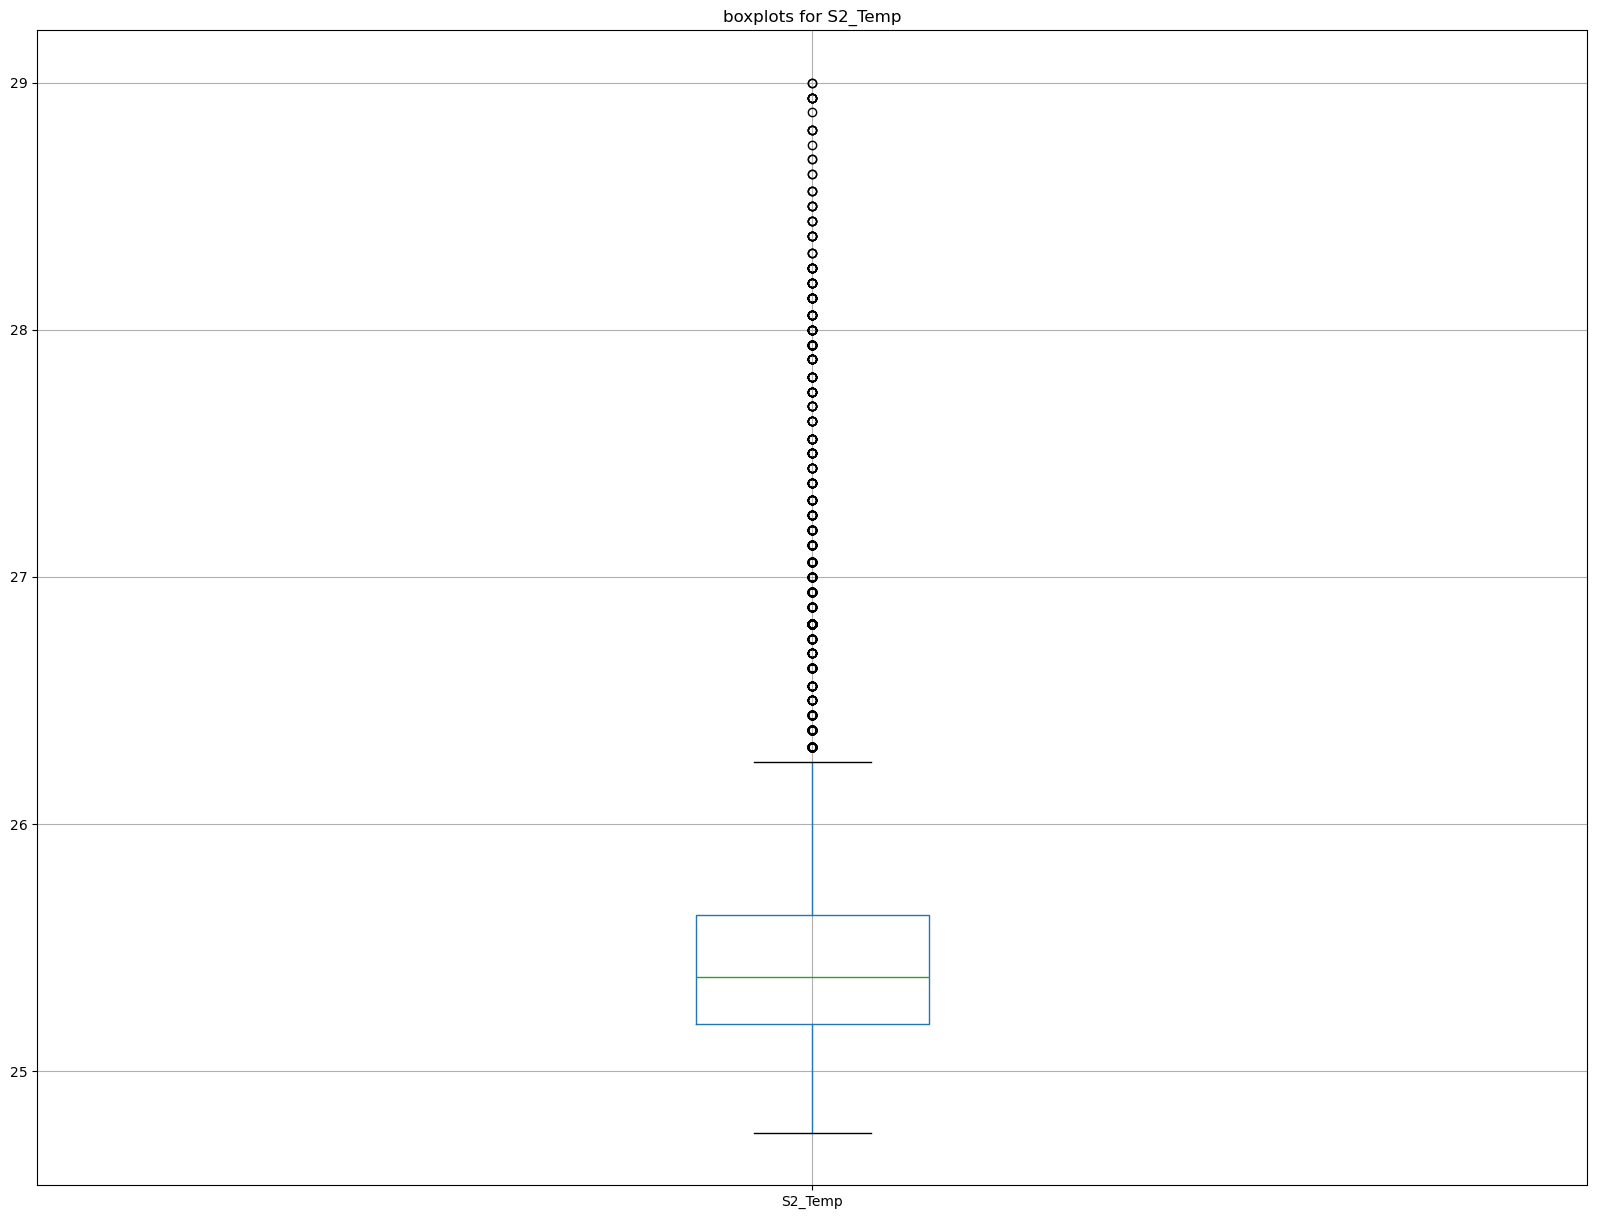

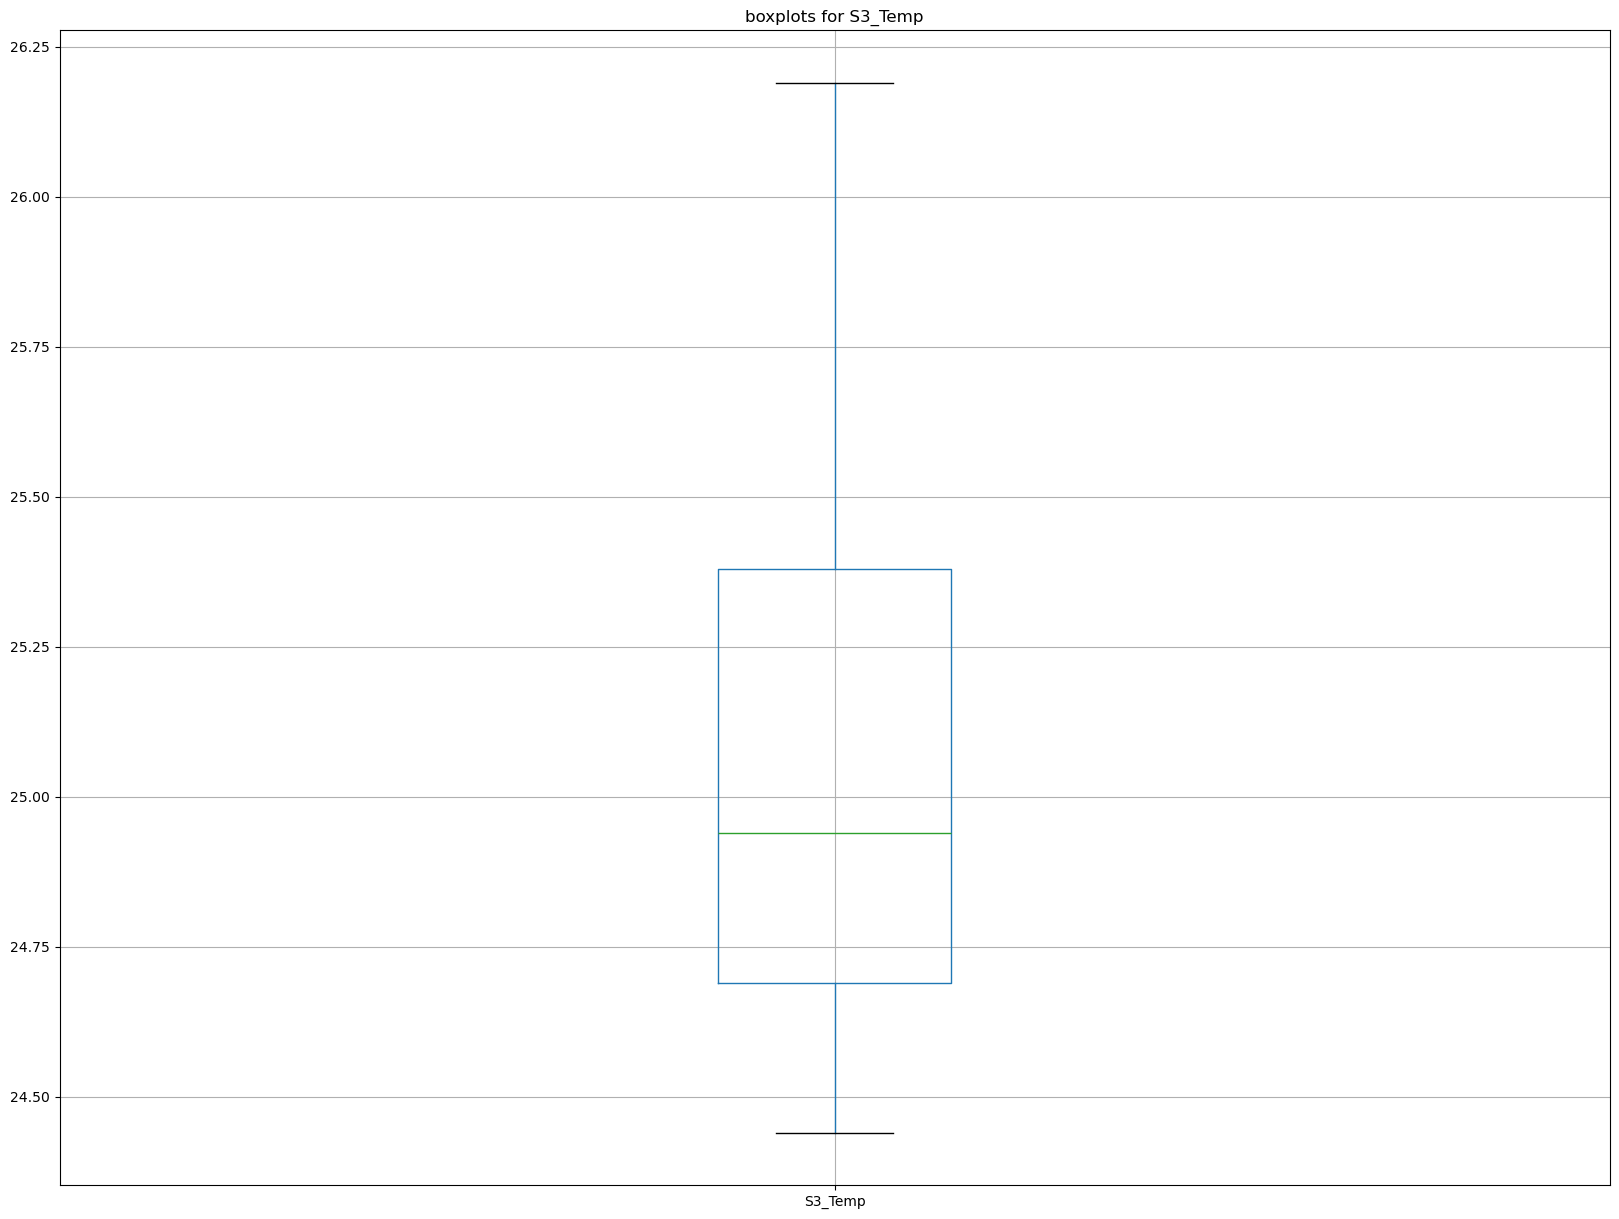

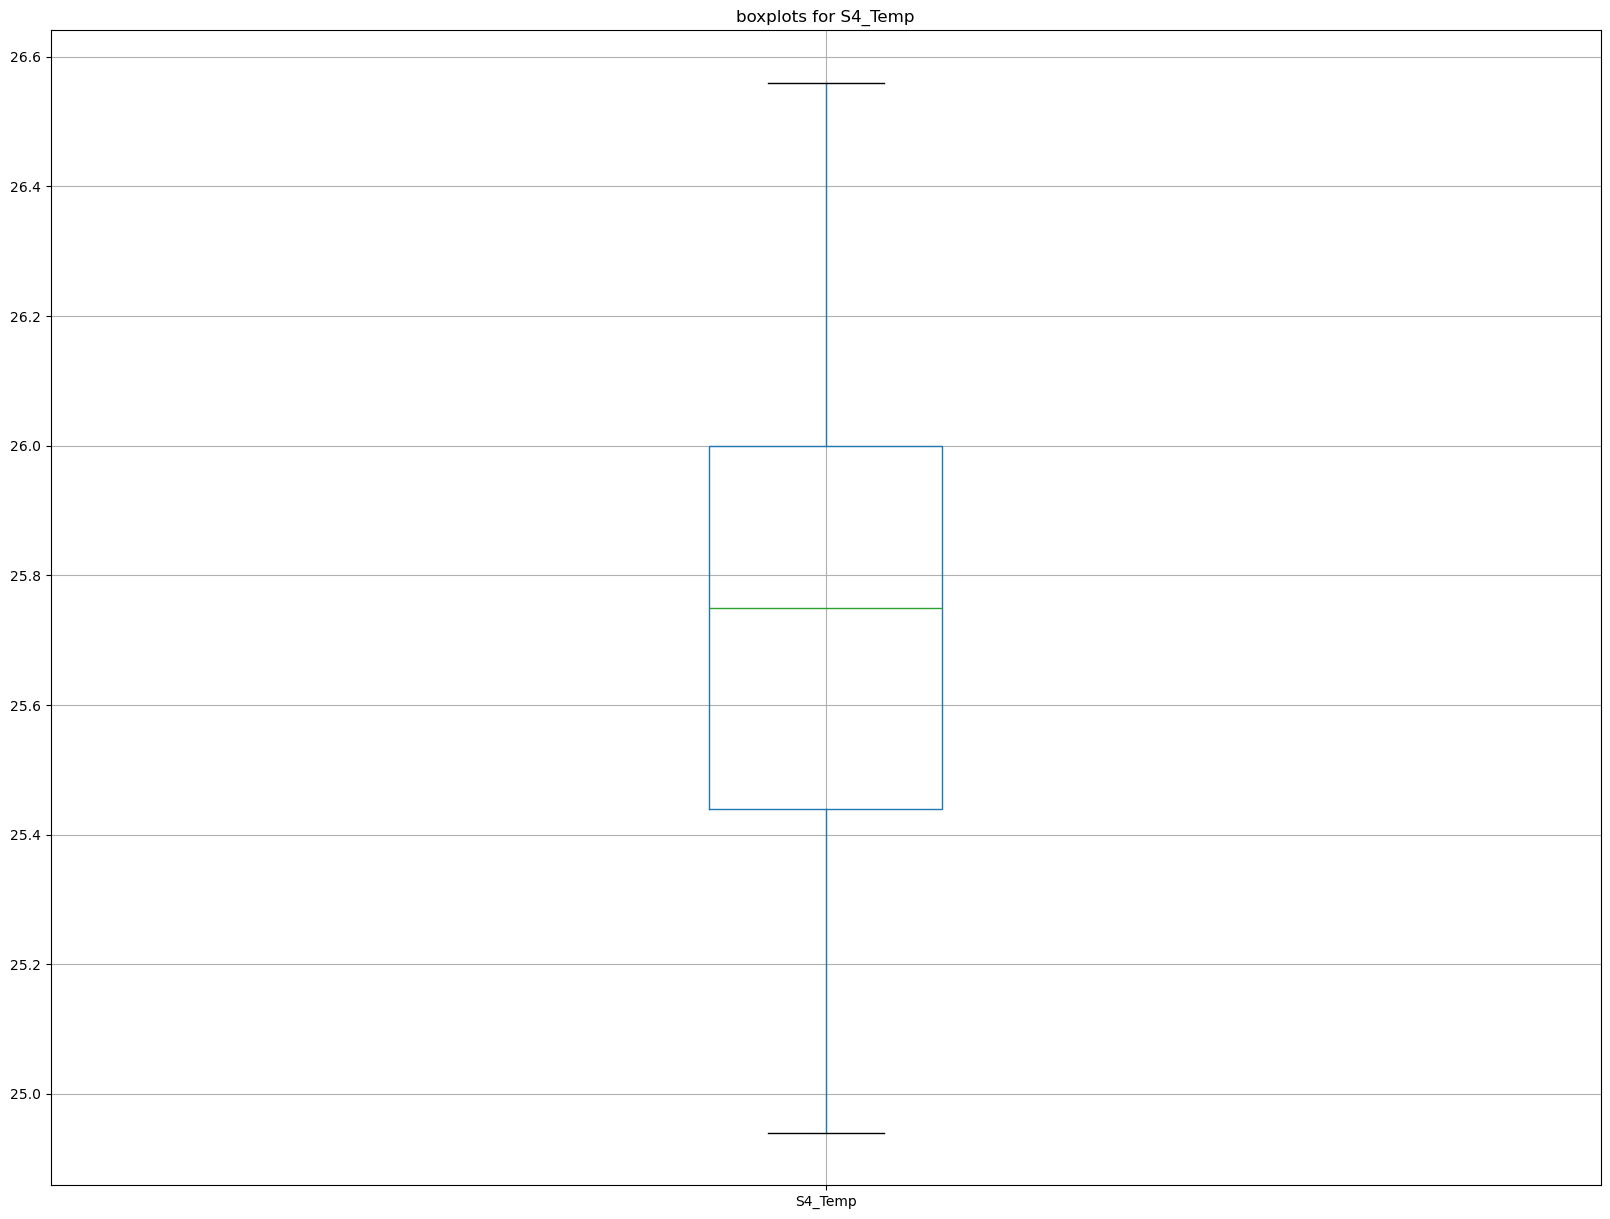

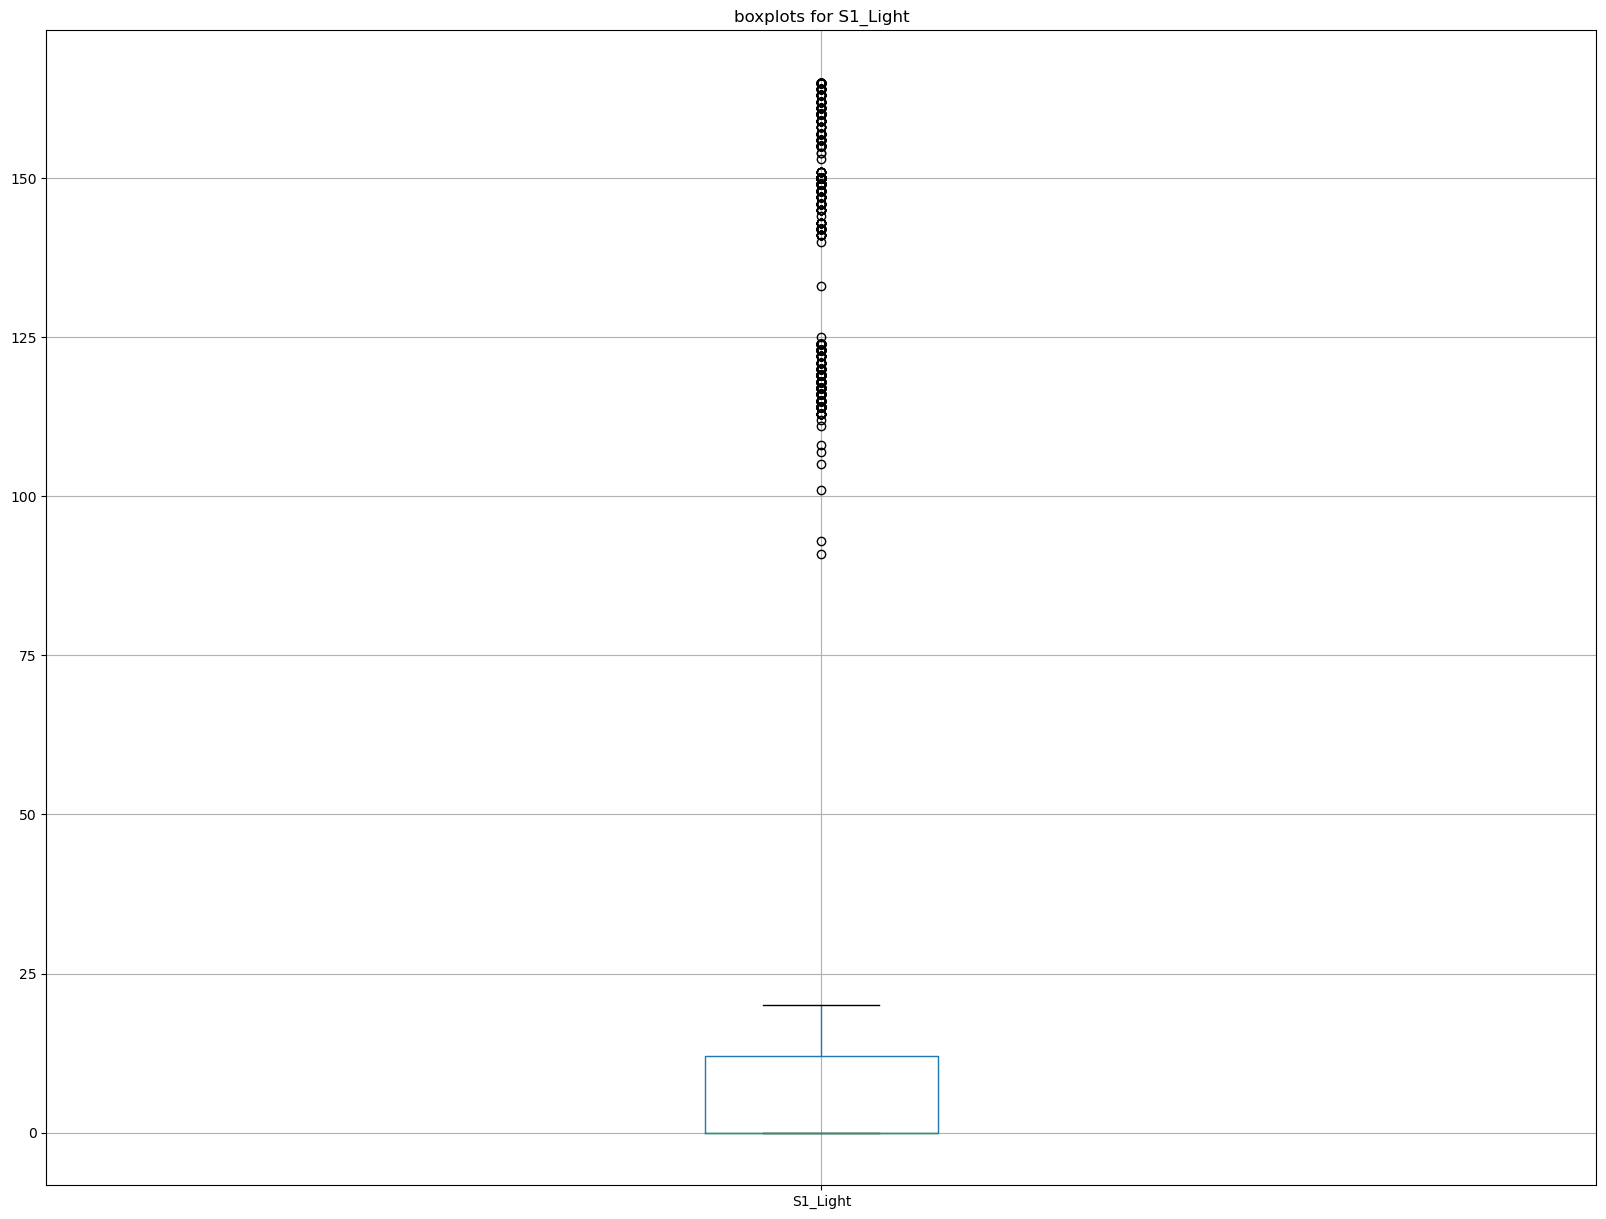

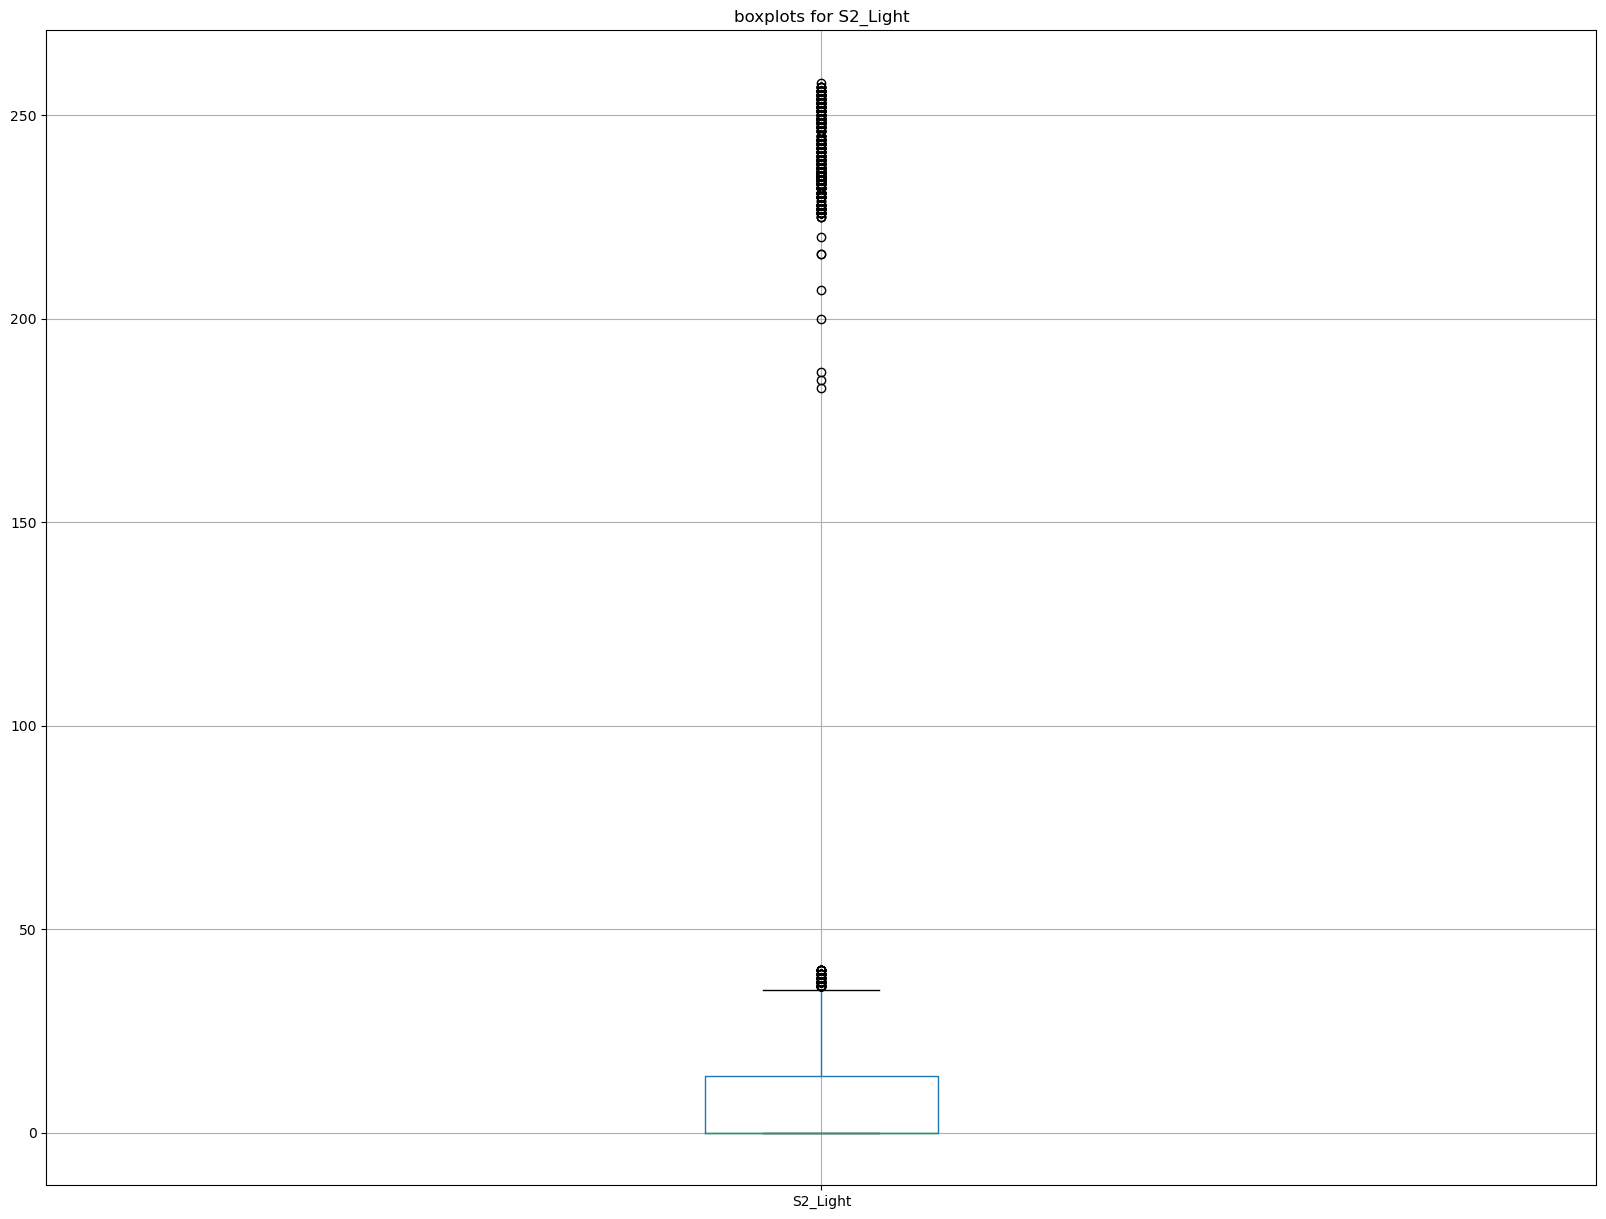

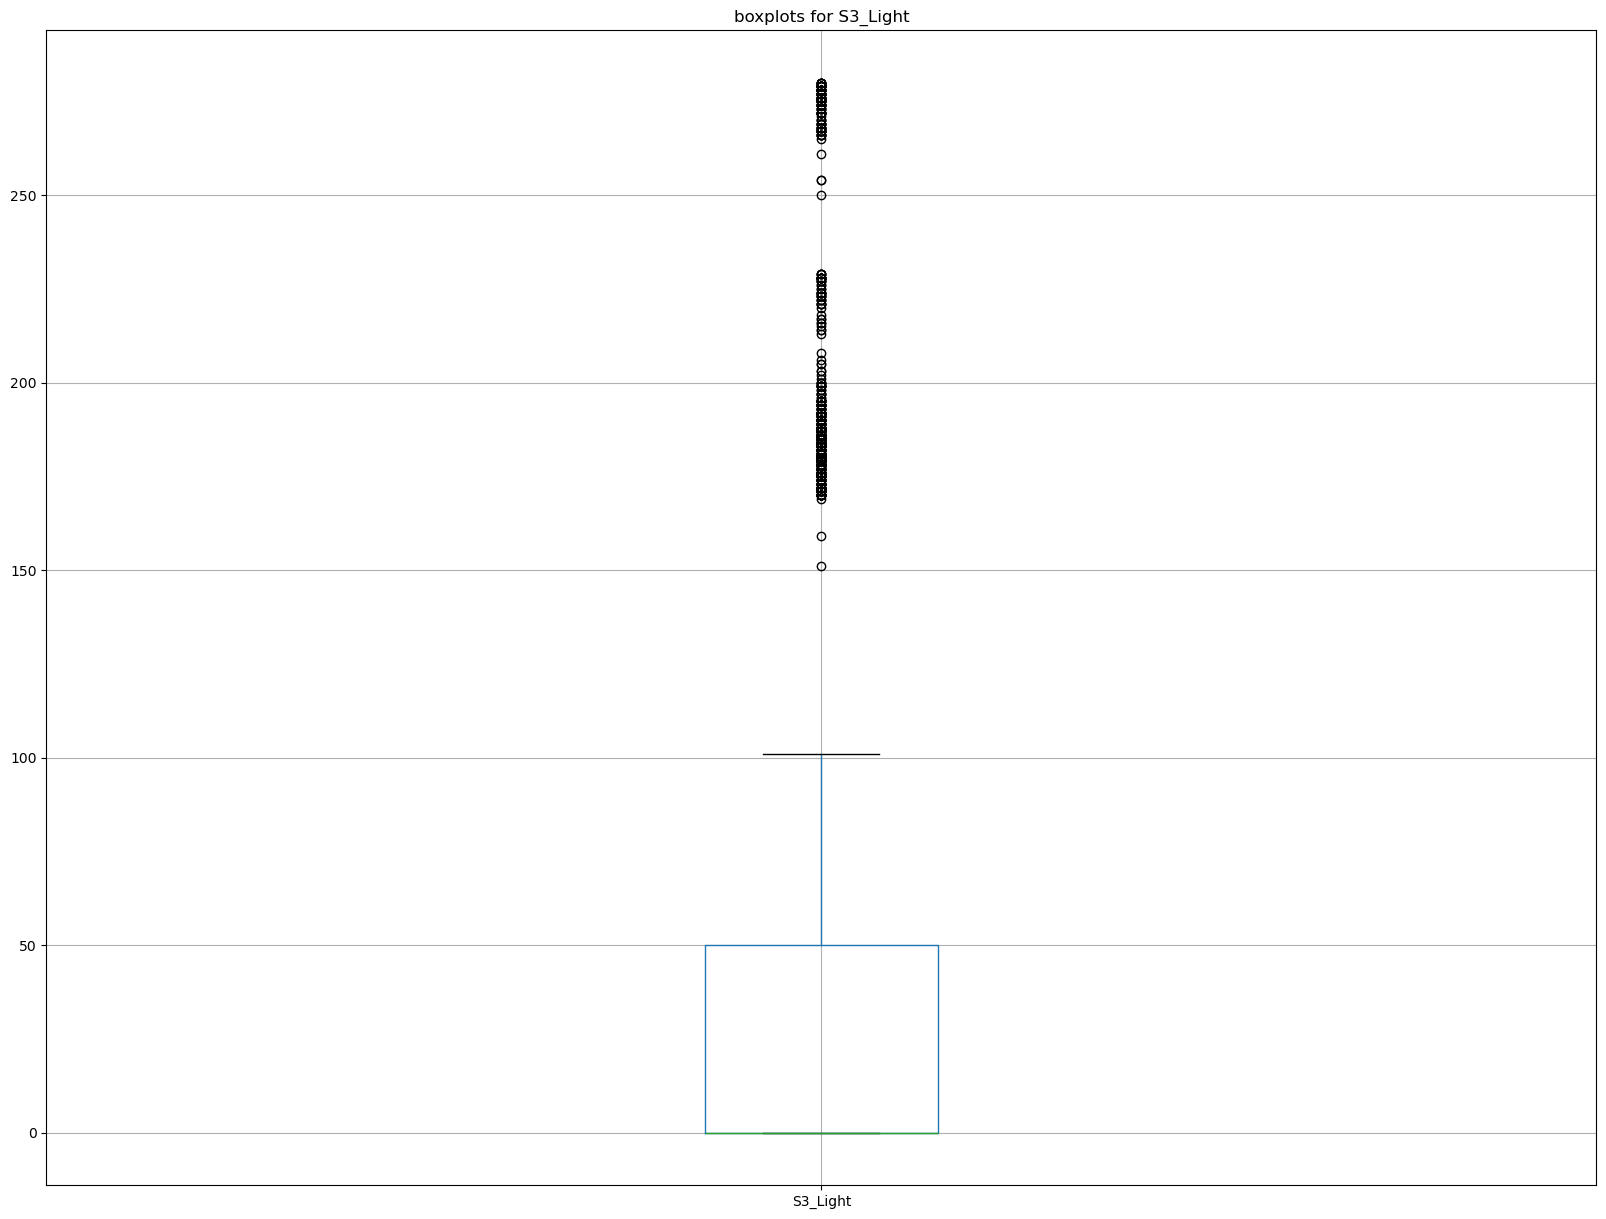

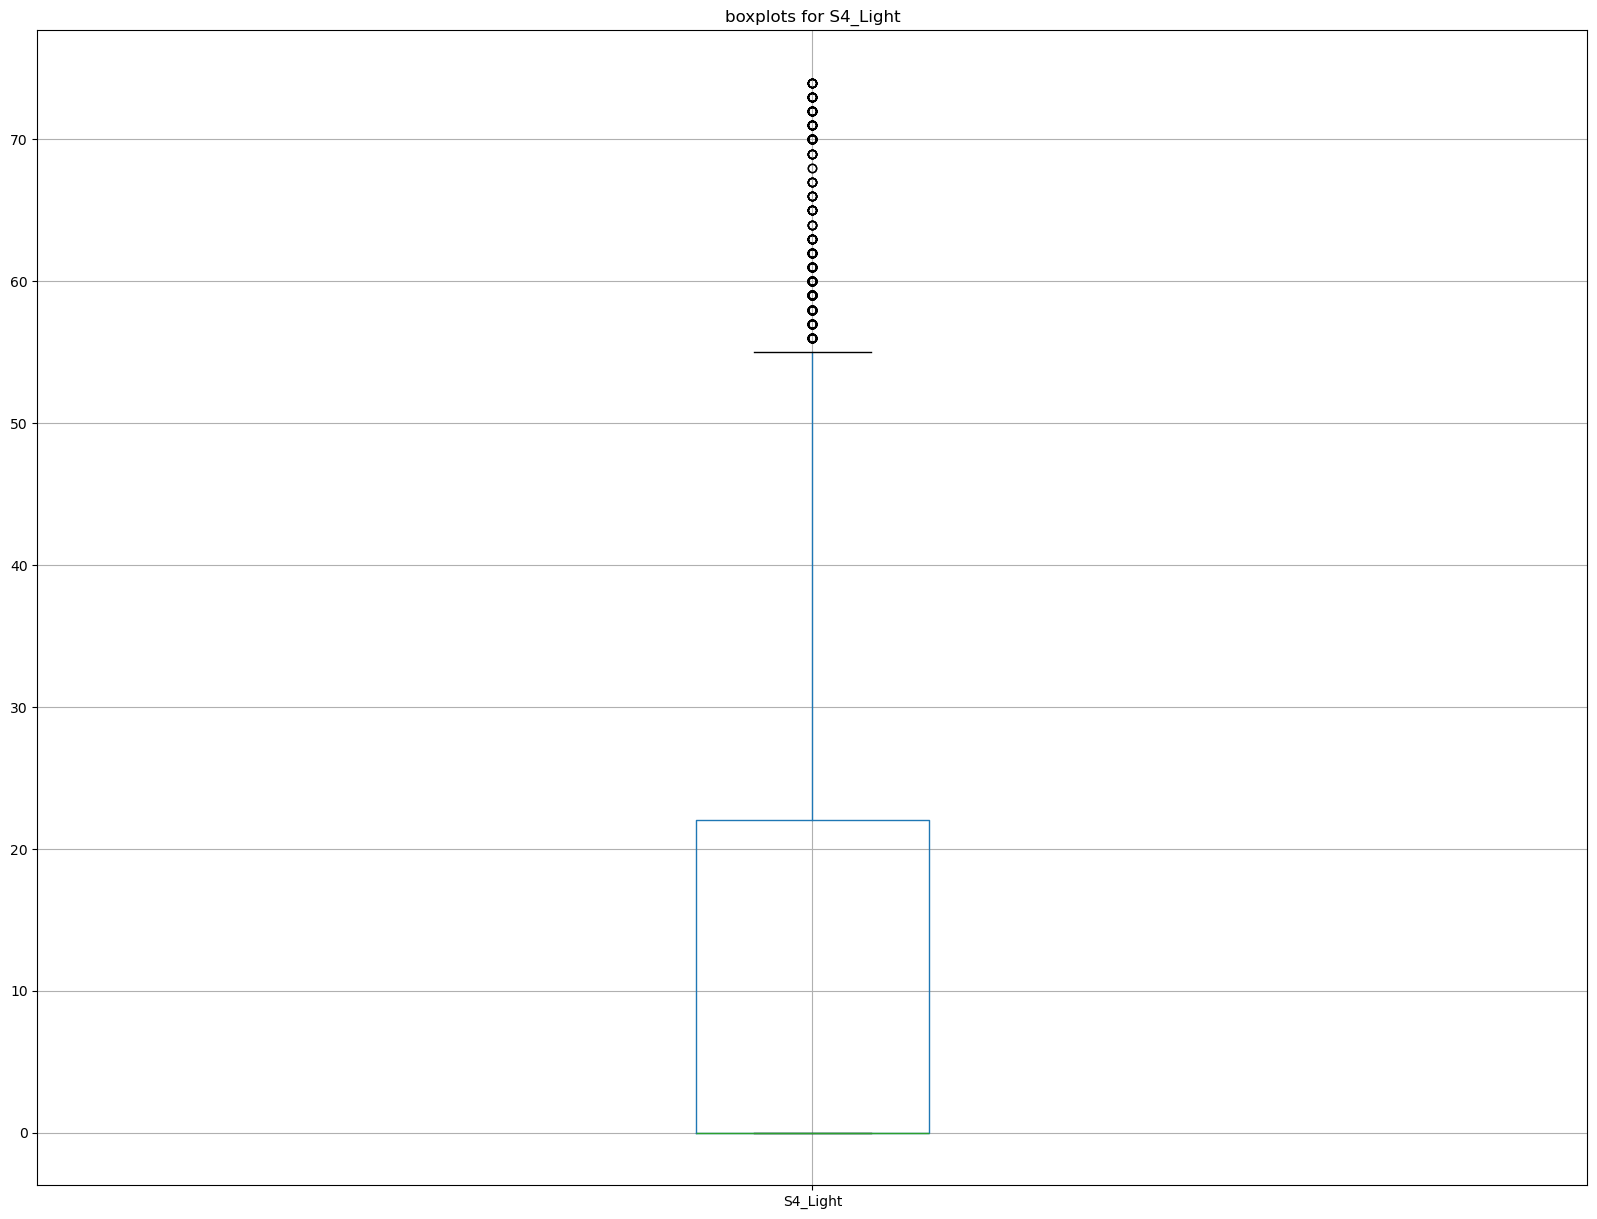

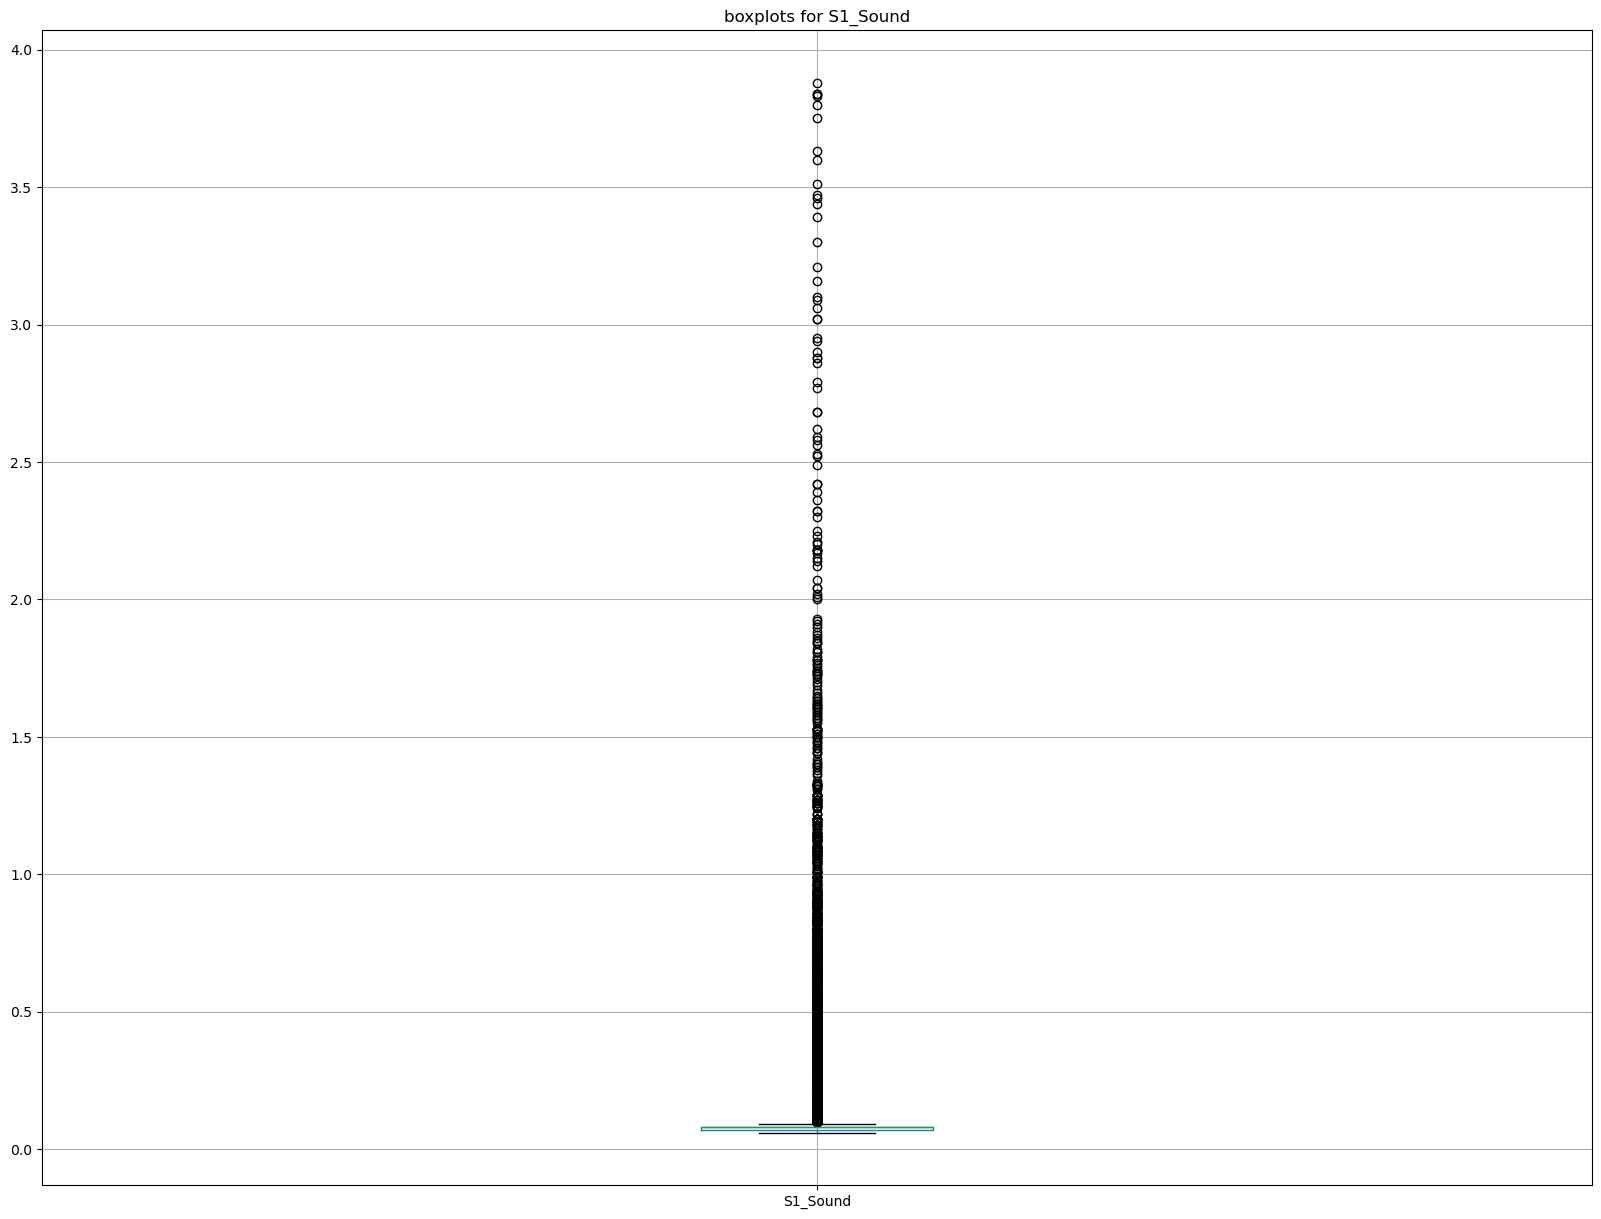

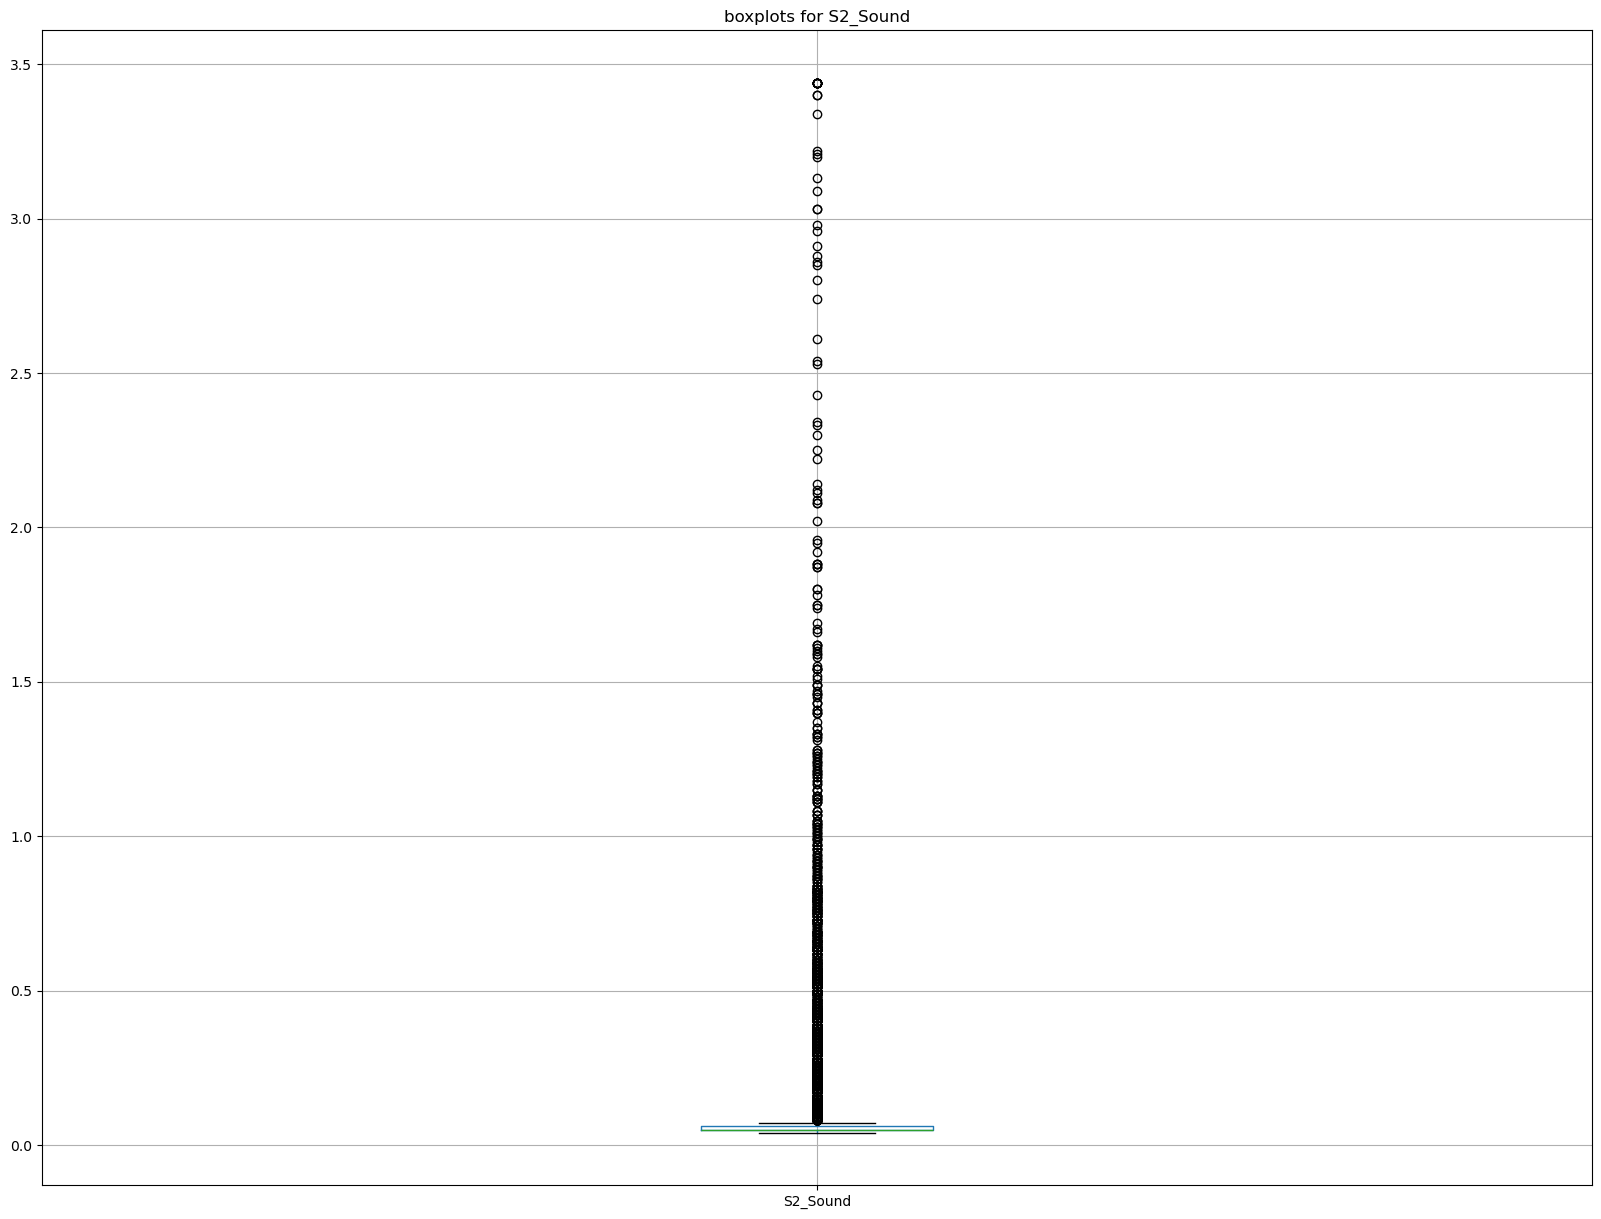

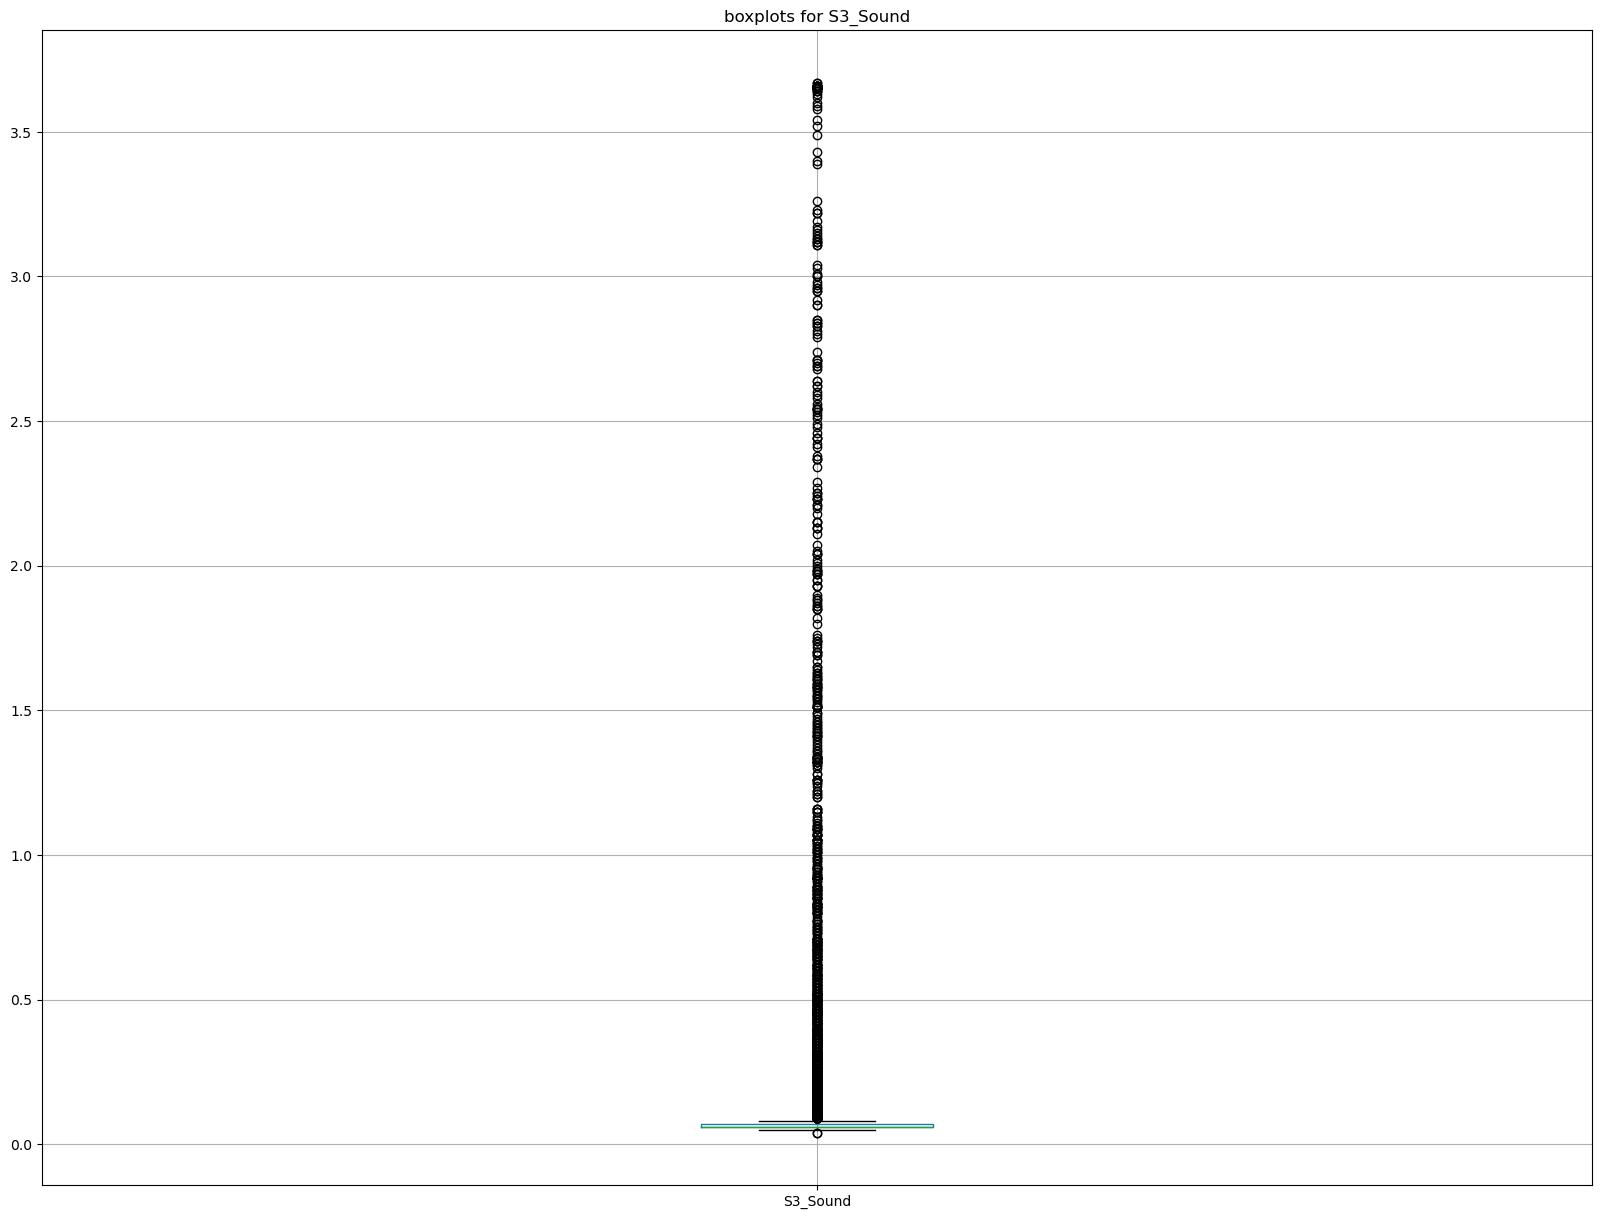

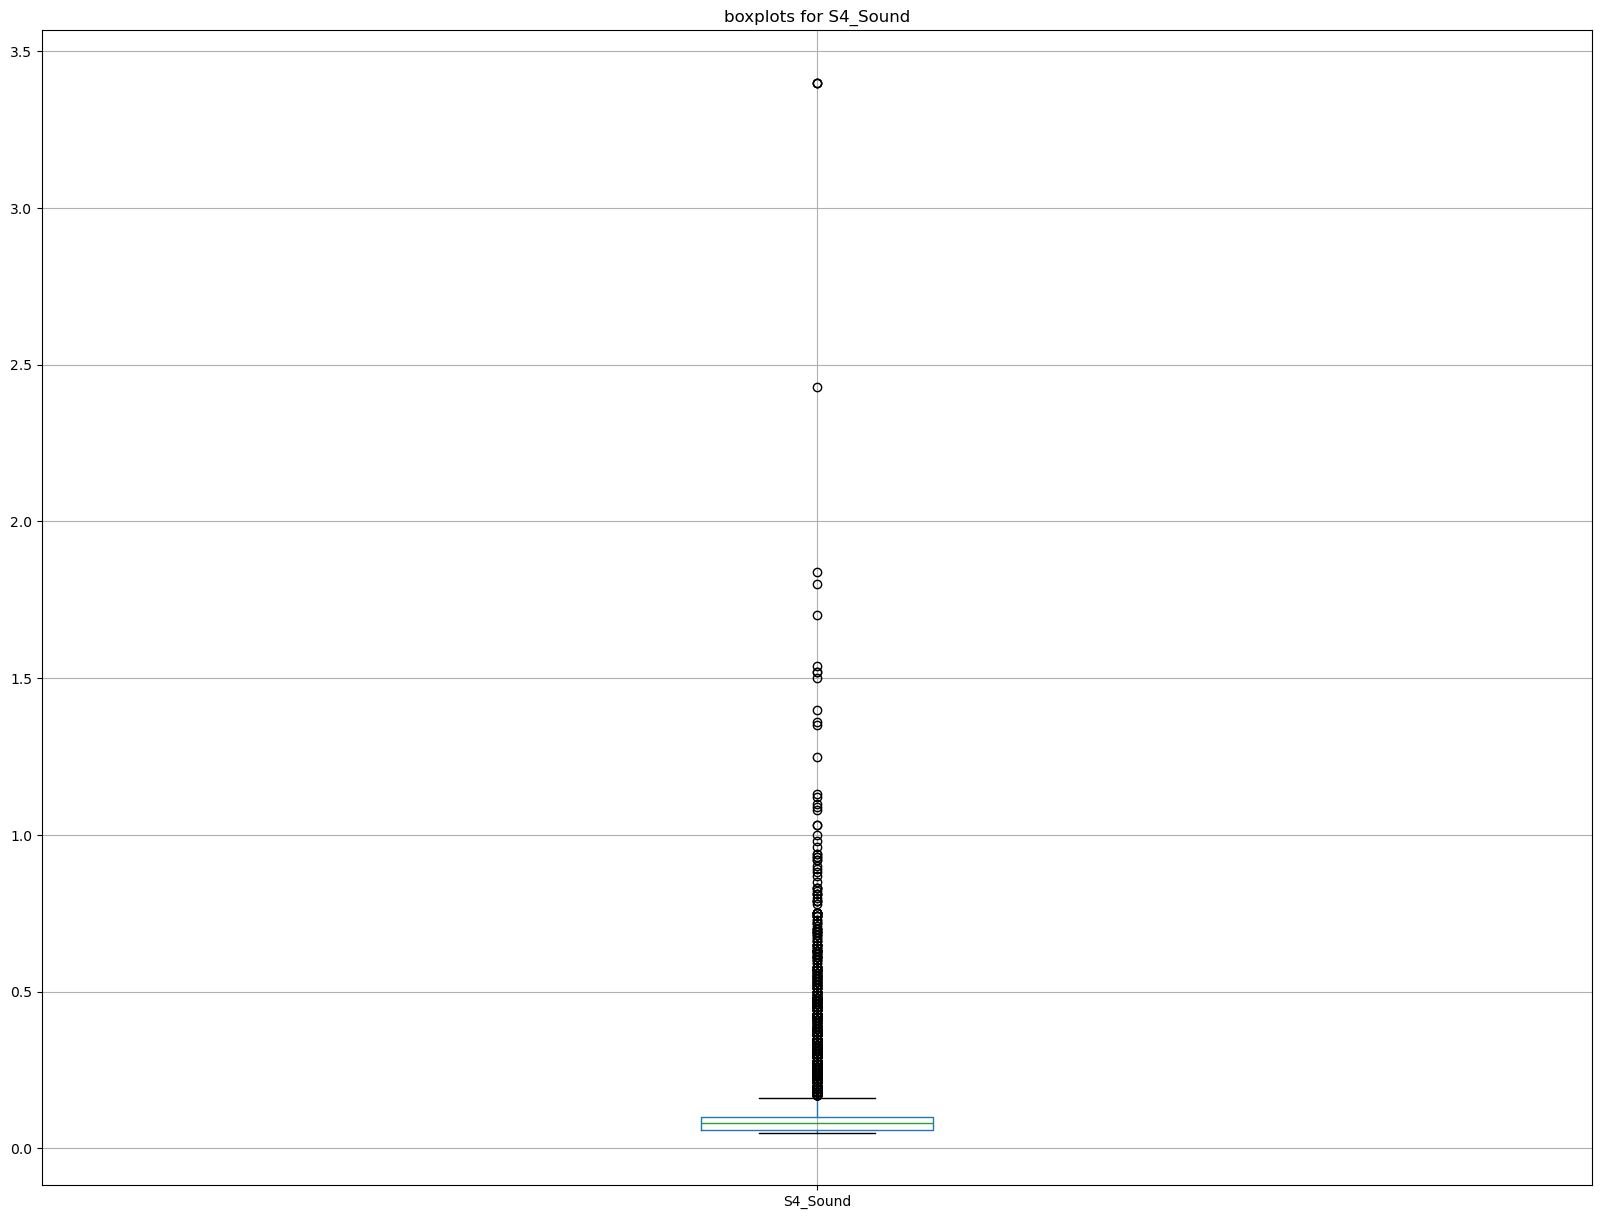

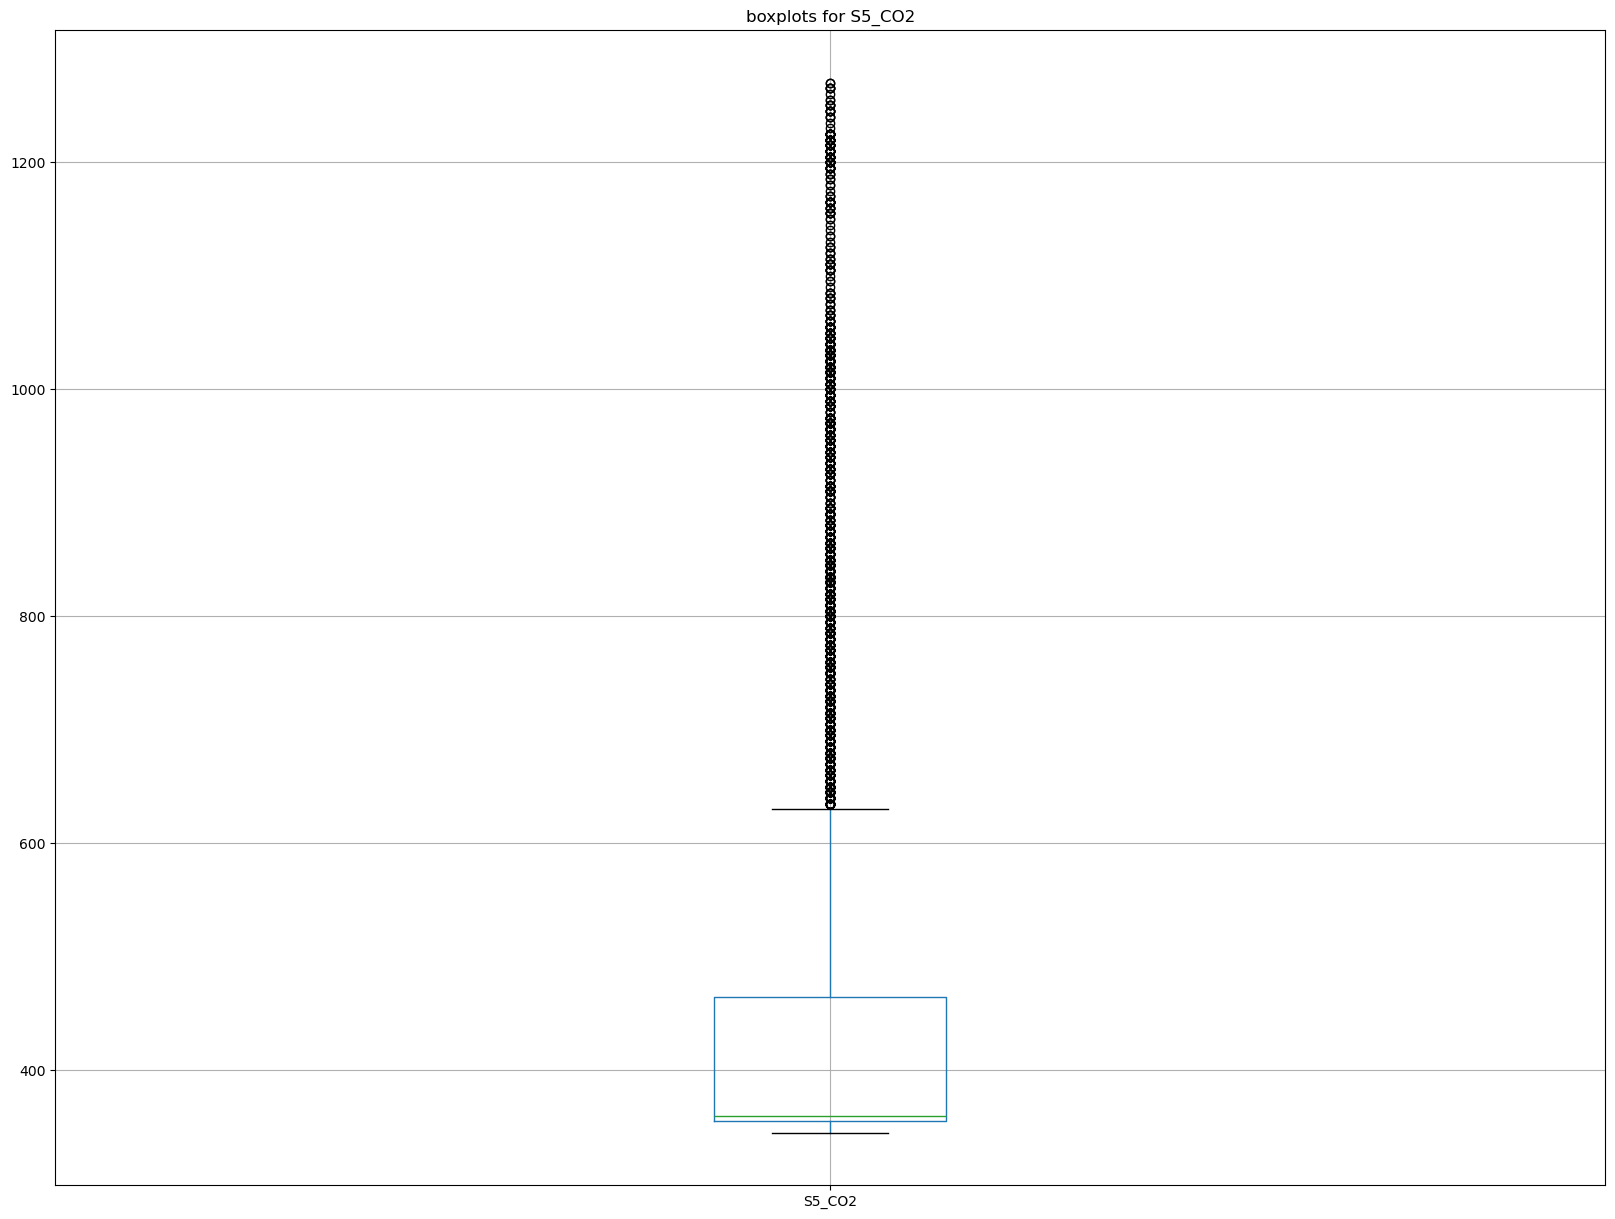

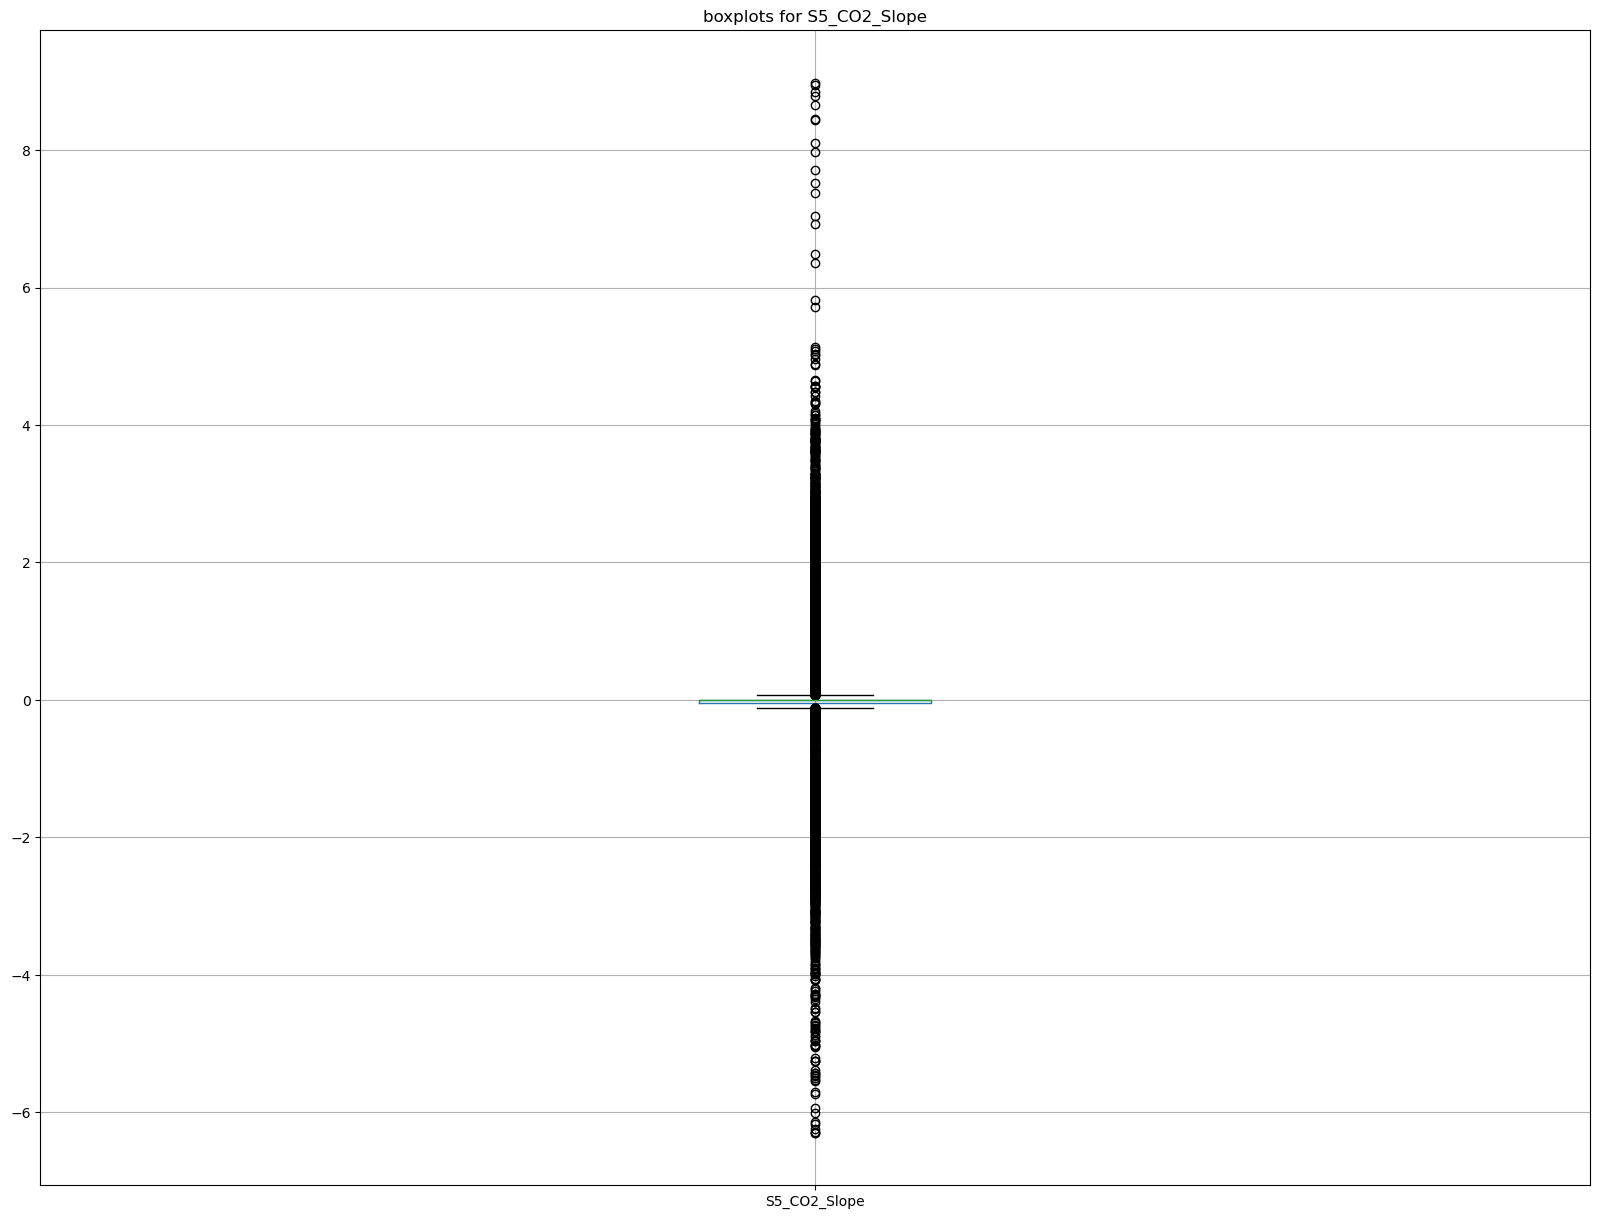

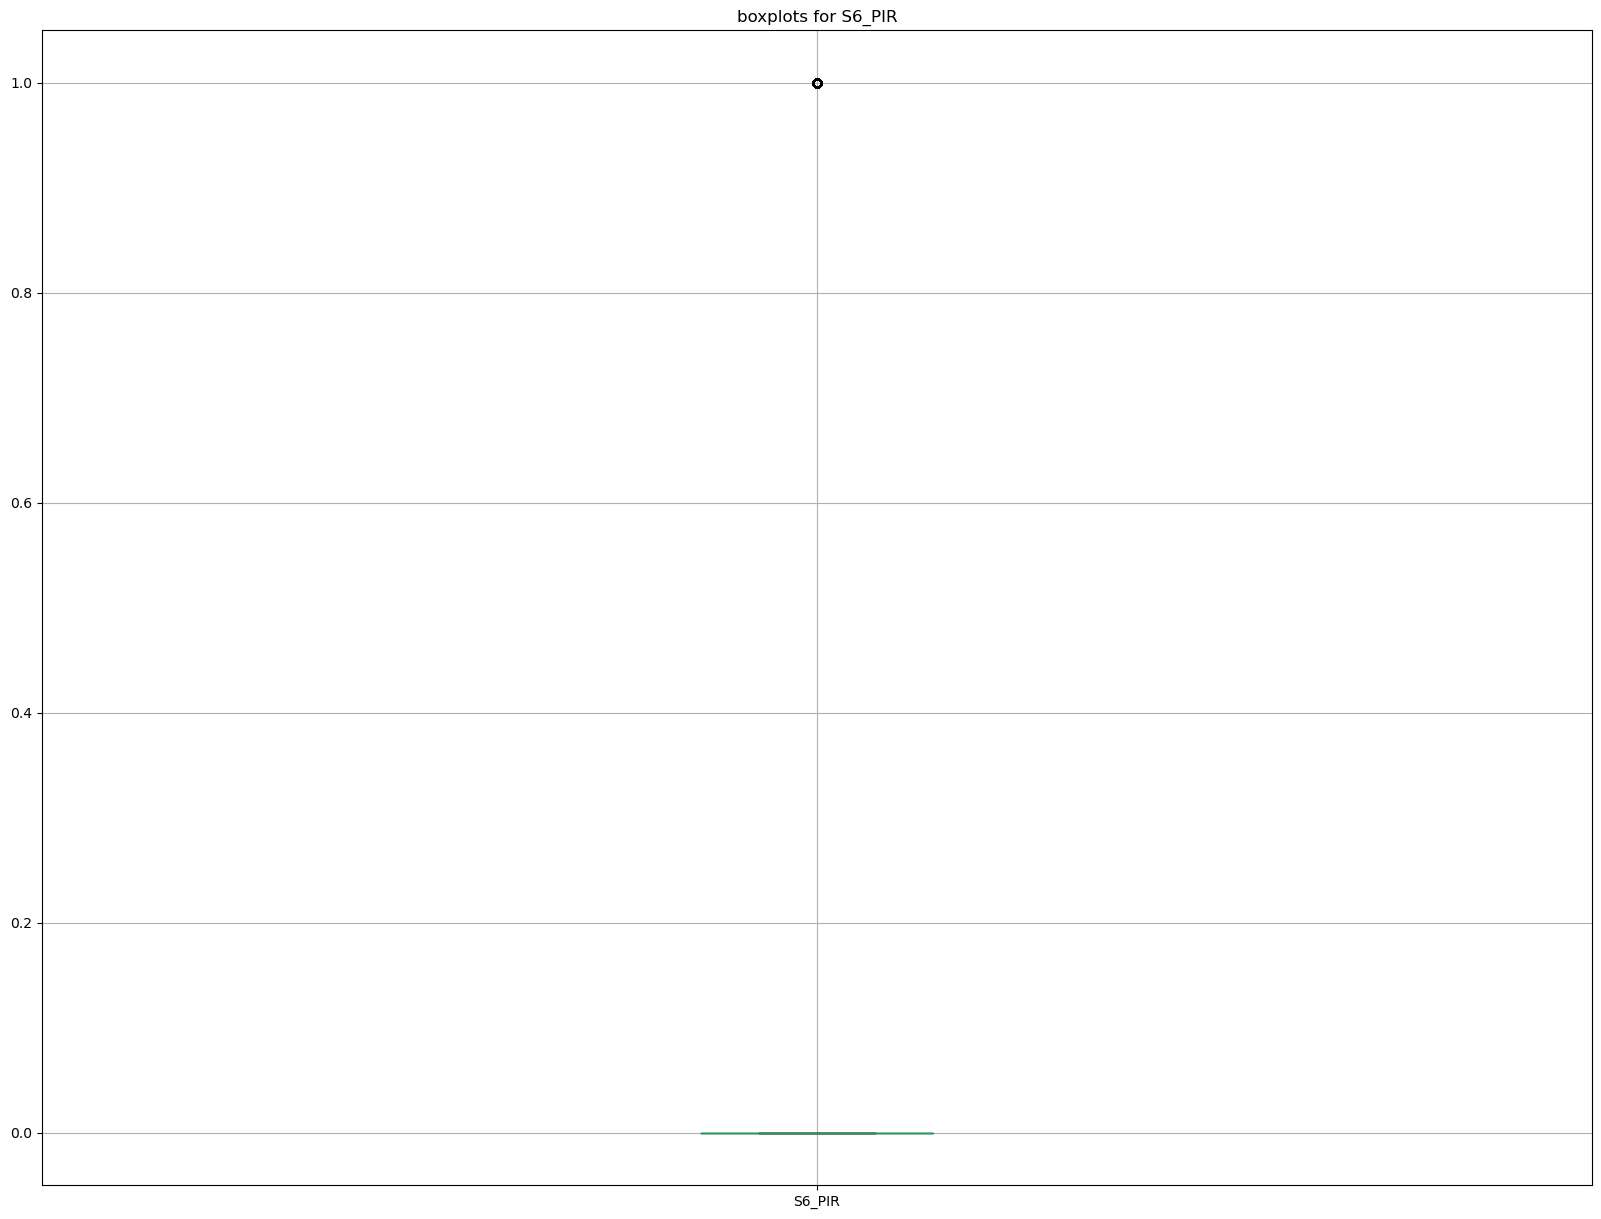

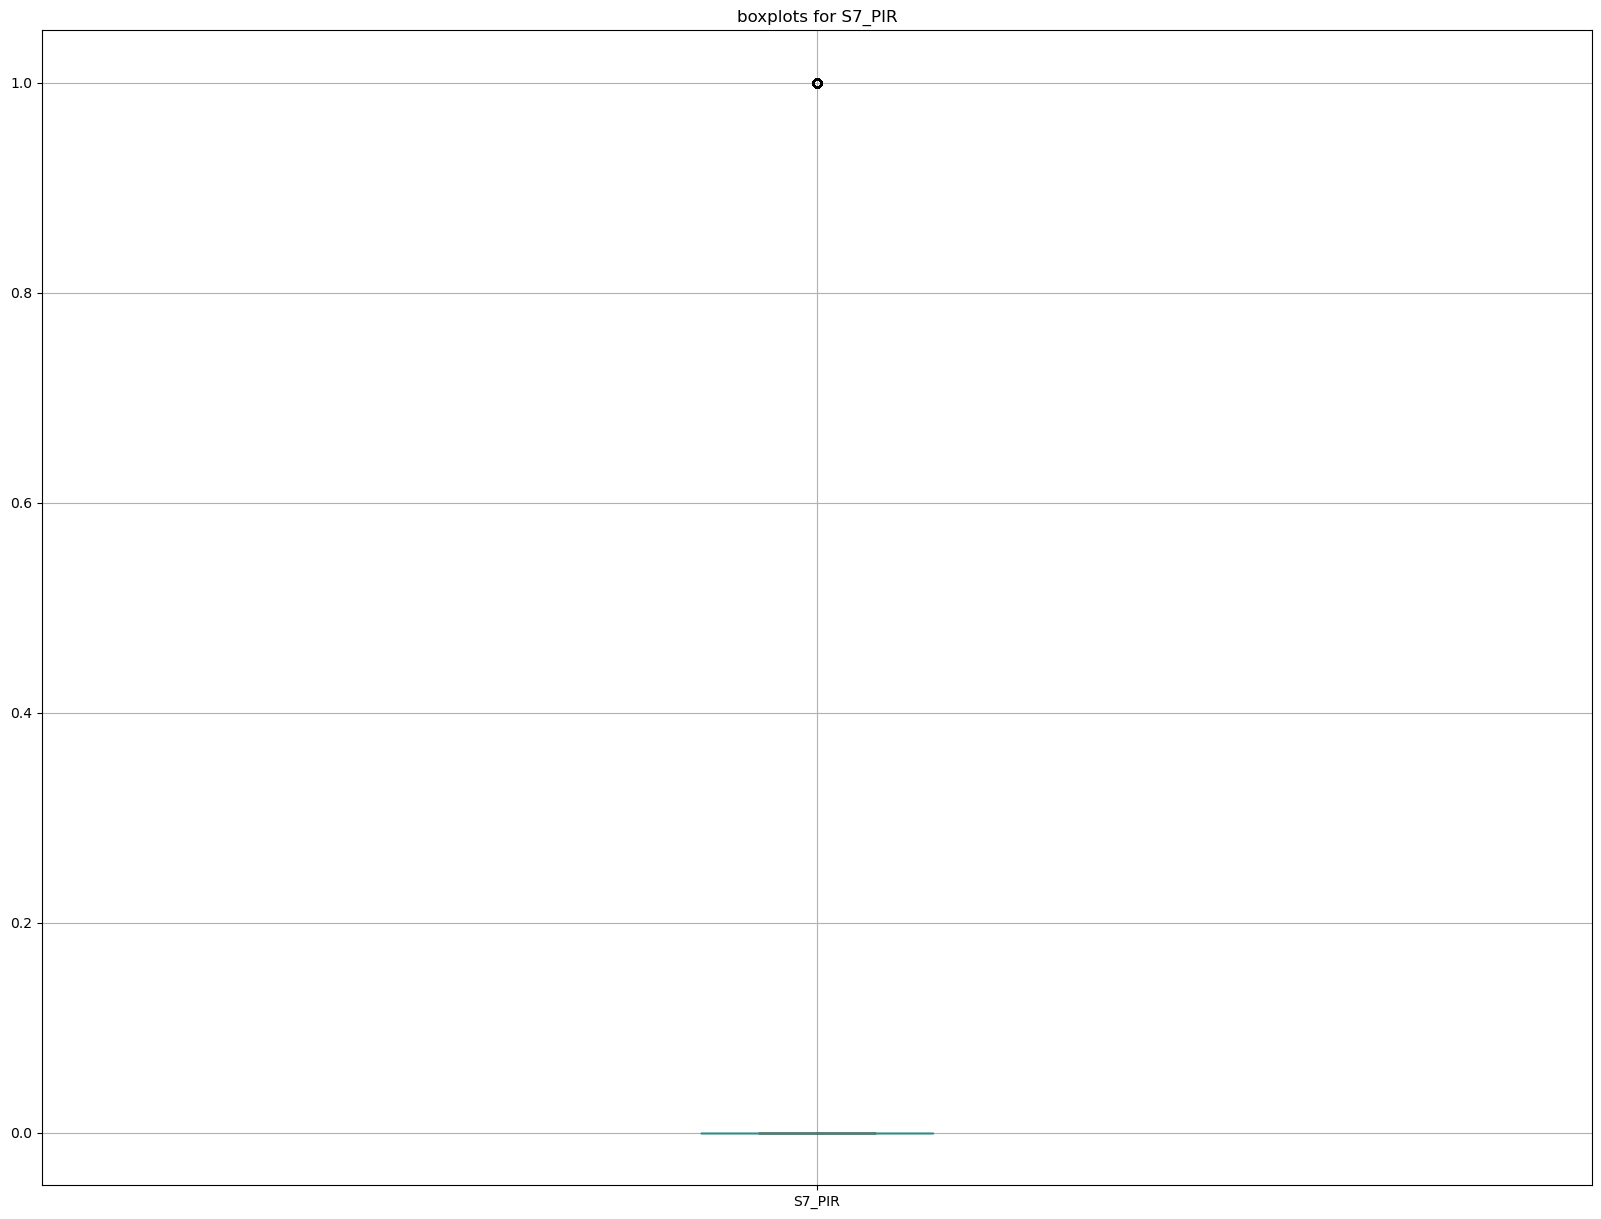

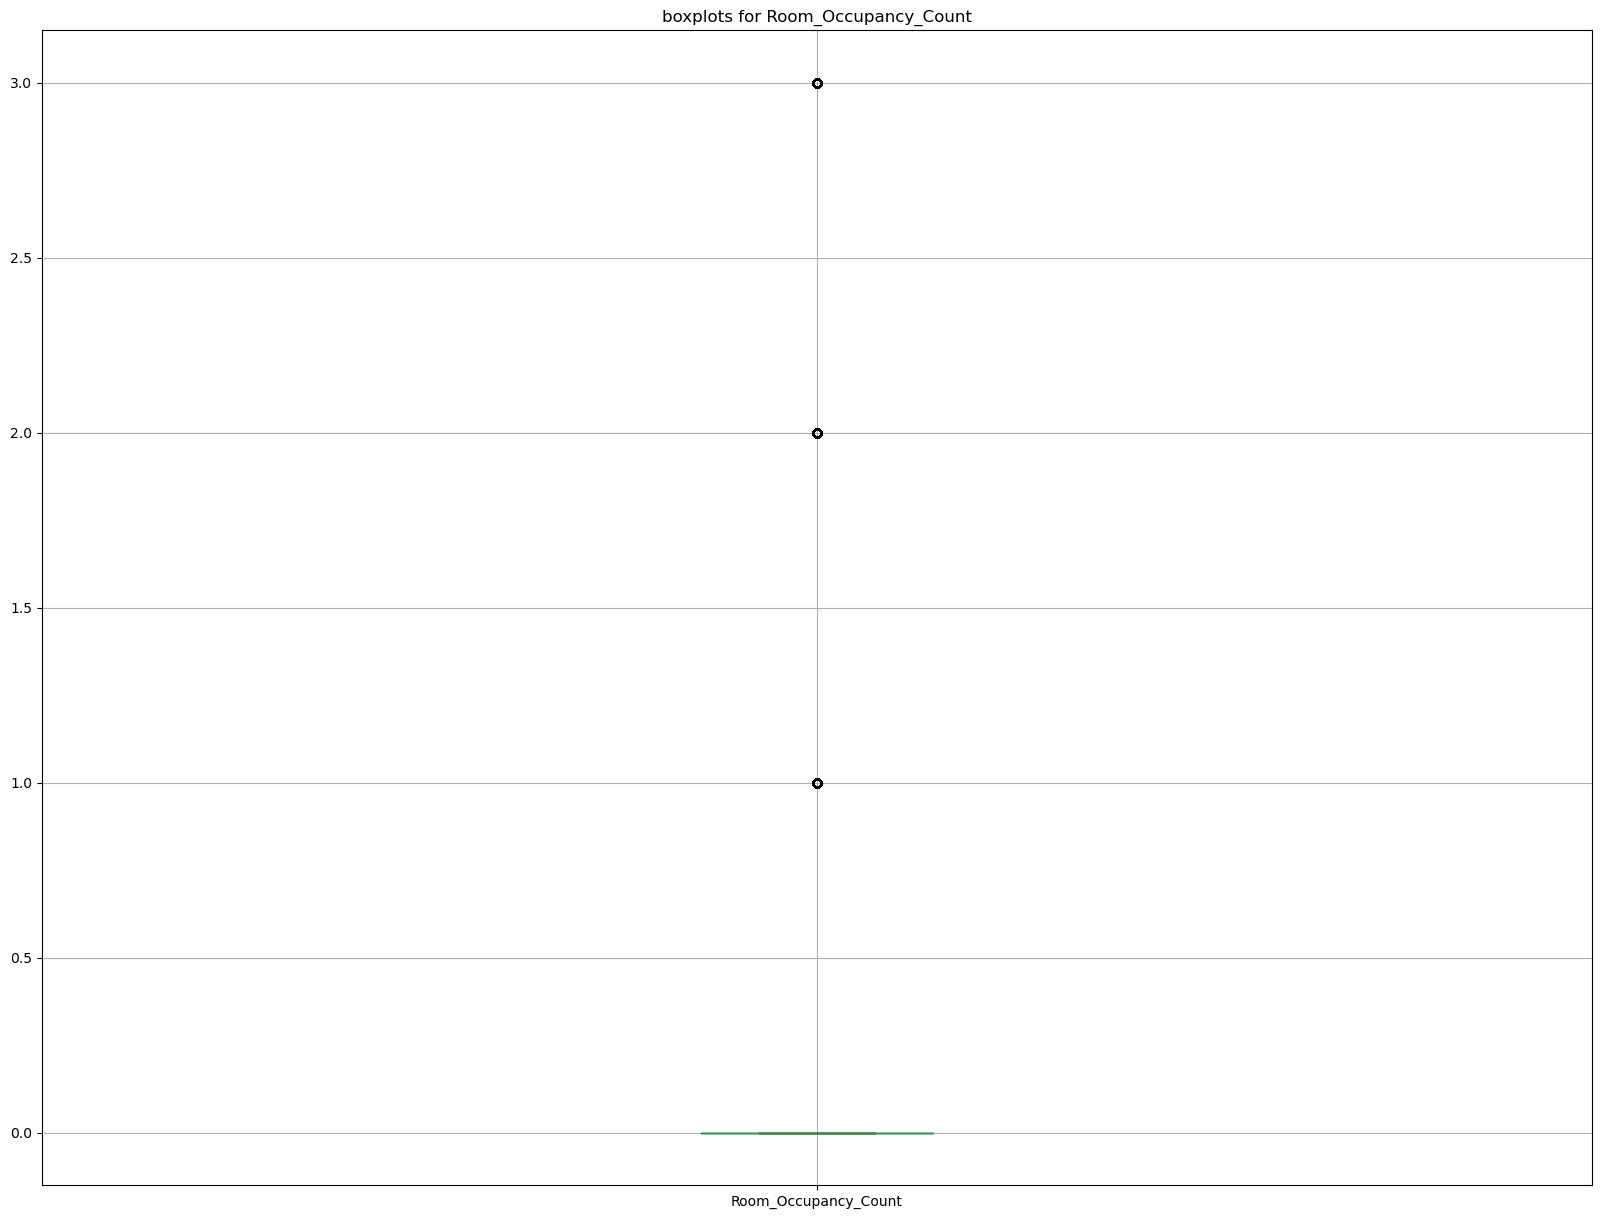

In [85]:
for column in numerical_columns.columns:
    plt.figure(figsize=(20,15))
    numerical_columns.boxplot(column=column)
    plt.title (f'boxplots for {column}')
    plt.show()

## Boxplot of entire dataframe

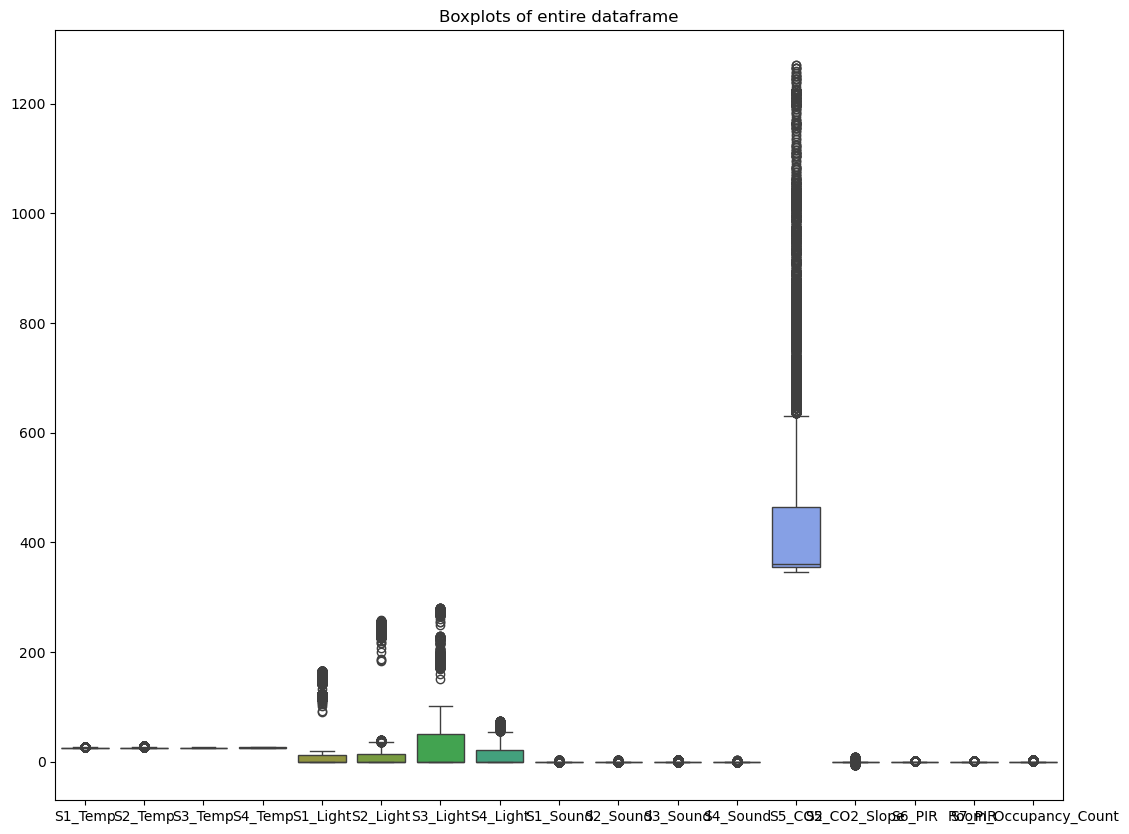

In [88]:
#Boxplot of entire dataframe
plt.figure (figsize = (13,10))
sns.boxplot(df)
plt.title('Boxplots of entire dataframe')
plt.show()

## Handling outliers

In [91]:
# handling outliers
def handling_outliers(df):
    for columns in df.select_dtypes(include=['int64','float64']).columns:
        q1 = df[columns].quantile(0.25)
        q3 = df[columns].quantile(0.75)
        IQR = q3 - q1
        lower = q1 - (1.5*IQR)
        upper = q3 + (1.5*IQR)

        #capping outliers
        df[columns]=df[columns].apply(lambda x:lower if x < lower else upper if x>upper else x)
    return df

In [93]:
df1 = handling_outliers(df)

In [95]:
df1.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,30.0,34.0,53.0,40.0,0.080,0.075,0.060,0.06,390.0,0.069231,0.0,0.0,0.0
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,30.0,33.0,53.0,40.0,0.095,0.050,0.060,0.06,390.0,0.069231,0.0,0.0,0.0
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,30.0,34.0,53.0,40.0,0.095,0.075,0.080,0.06,390.0,0.069231,0.0,0.0,0.0
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,30.0,34.0,53.0,40.0,0.095,0.075,0.085,0.09,390.0,0.069231,0.0,0.0,0.0
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,30.0,34.0,54.0,40.0,0.095,0.060,0.060,0.06,390.0,0.069231,0.0,0.0,0.0


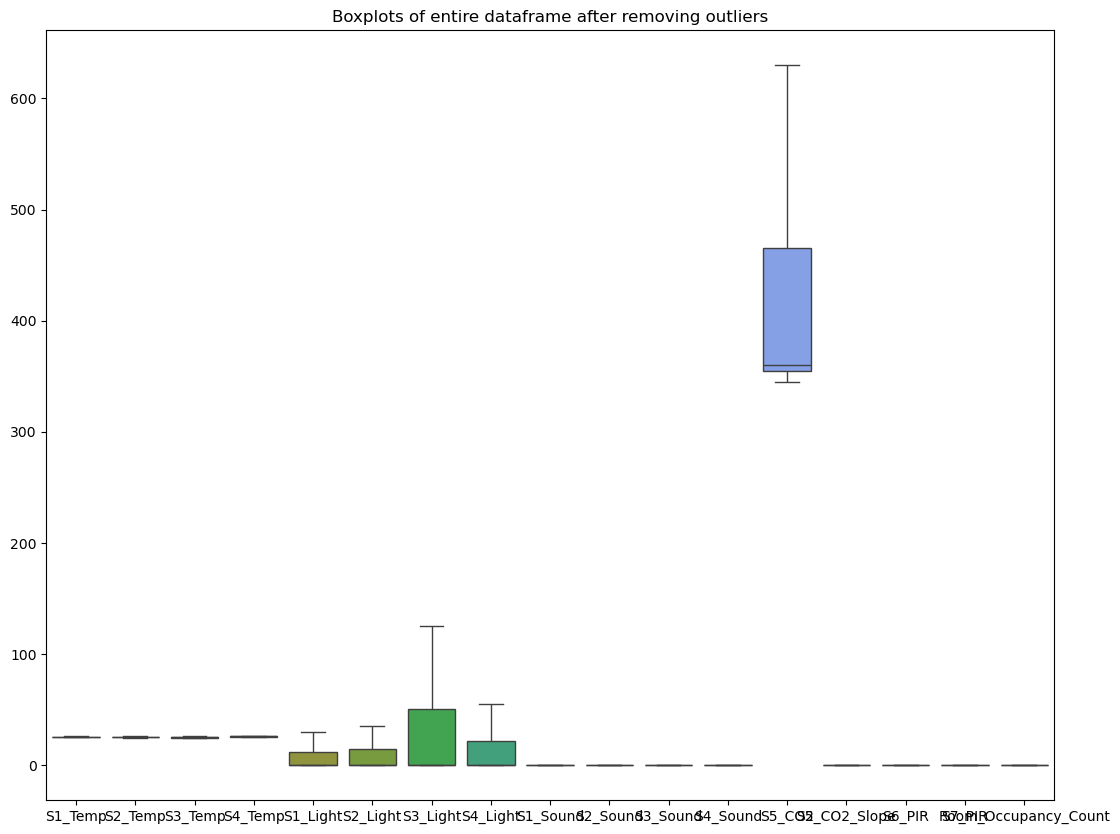

In [103]:
plt.figure (figsize = (13,10))
sns.boxplot(df1)
plt.title('Boxplots of entire dataframe after removing outliers')
plt.show()

In [105]:
df1.head(6)

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,24.94,24.75,24.56,25.38,30.0,34.0,53.0,40.0,0.080,0.075,0.060,0.06,390.0,0.069231,0.0,0.0,0.0
1,24.94,24.75,24.56,25.44,30.0,33.0,53.0,40.0,0.095,0.050,0.060,0.06,390.0,0.069231,0.0,0.0,0.0
2,25.00,24.75,24.50,25.44,30.0,34.0,53.0,40.0,0.095,0.075,0.080,0.06,390.0,0.069231,0.0,0.0,0.0
3,25.00,24.75,24.56,25.44,30.0,34.0,53.0,40.0,0.095,0.075,0.085,0.09,390.0,0.069231,0.0,0.0,0.0
4,25.00,24.75,24.56,25.44,30.0,34.0,54.0,40.0,0.095,0.060,0.060,0.06,390.0,0.069231,0.0,0.0,0.0
5,25.00,24.81,24.56,25.44,30.0,34.0,54.0,40.0,0.095,0.060,0.060,0.07,390.0,0.069231,0.0,0.0,0.0


array([[<Axes: title={'center': 'S1_Temp'}>,
        <Axes: title={'center': 'S2_Temp'}>,
        <Axes: title={'center': 'S3_Temp'}>,
        <Axes: title={'center': 'S4_Temp'}>],
       [<Axes: title={'center': 'S1_Light'}>,
        <Axes: title={'center': 'S2_Light'}>,
        <Axes: title={'center': 'S3_Light'}>,
        <Axes: title={'center': 'S4_Light'}>],
       [<Axes: title={'center': 'S1_Sound'}>,
        <Axes: title={'center': 'S2_Sound'}>,
        <Axes: title={'center': 'S3_Sound'}>,
        <Axes: title={'center': 'S4_Sound'}>],
       [<Axes: title={'center': 'S5_CO2'}>,
        <Axes: title={'center': 'S5_CO2_Slope'}>,
        <Axes: title={'center': 'S6_PIR'}>,
        <Axes: title={'center': 'S7_PIR'}>],
       [<Axes: title={'center': 'Room_Occupancy_Count'}>, <Axes: >,
        <Axes: >, <Axes: >]], dtype=object)

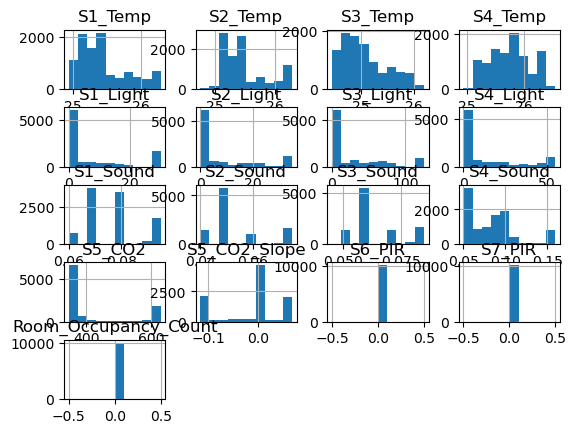

In [107]:
df1.hist()

In [109]:
numerical_features = df1.select_dtypes(include=['float64','int64']).columns

In [111]:
print(df1[numerical_features].skew())

S1_Temp                 0.943261
S2_Temp                 0.991328
S3_Temp                 0.650162
S4_Temp                 0.129630
S1_Light                1.262649
S2_Light                1.330326
S3_Light                1.321765
S4_Light                1.230777
S1_Sound                0.379921
S2_Sound                0.913251
S3_Sound                0.823956
S4_Sound                1.180853
S5_CO2                  1.201290
S5_CO2_Slope           -0.462433
S6_PIR                  0.000000
S7_PIR                  0.000000
Room_Occupancy_Count    0.000000
dtype: float64


In [113]:
from scipy.stats import skew

S1_Temp
0.9431208673071627


<Figure size 640x480 with 0 Axes>

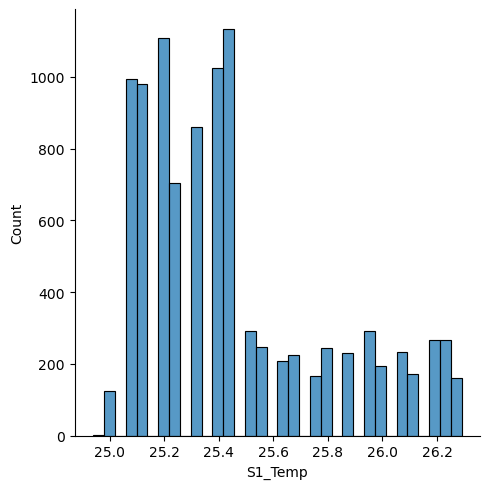

S2_Temp
0.9911815595612865


<Figure size 640x480 with 0 Axes>

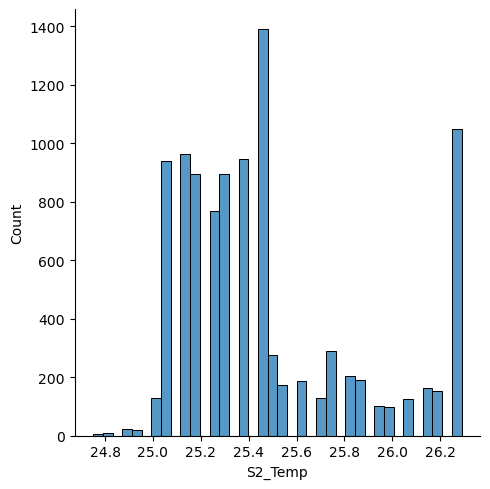

S3_Temp
0.6500657634319671


<Figure size 640x480 with 0 Axes>

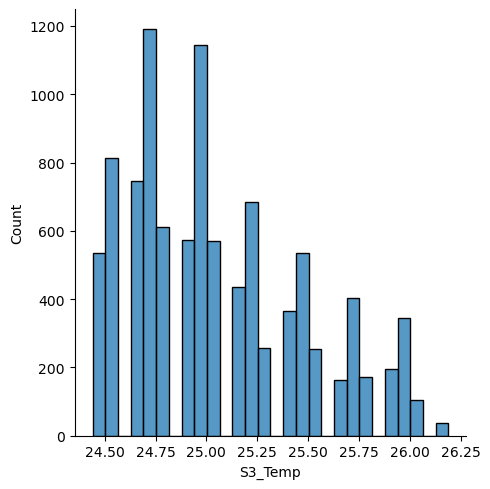

S4_Temp
0.12961098318145728


<Figure size 640x480 with 0 Axes>

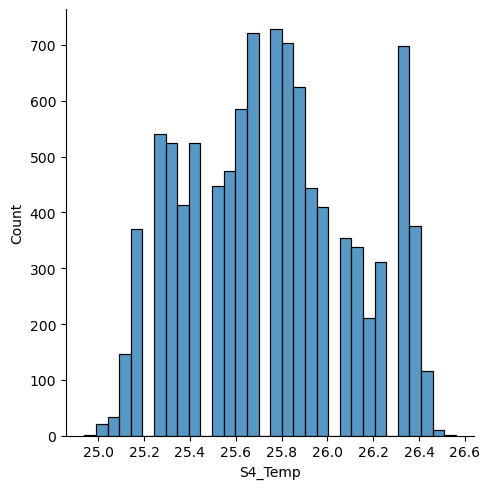

S1_Light
1.2624622392047413


<Figure size 640x480 with 0 Axes>

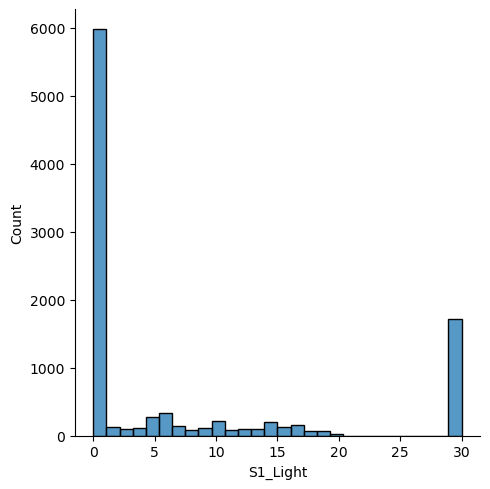

S2_Light
1.3301294302186


<Figure size 640x480 with 0 Axes>

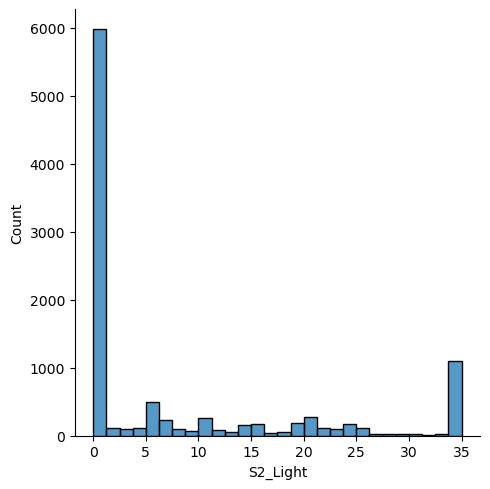

S3_Light
1.3215696896678457


<Figure size 640x480 with 0 Axes>

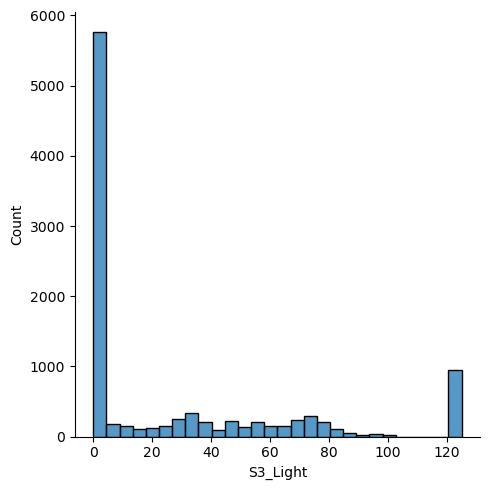

S4_Light
1.2305949634310045


<Figure size 640x480 with 0 Axes>

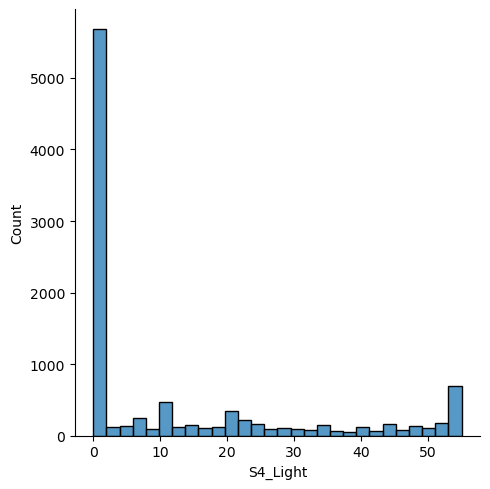

S1_Sound
0.37986447719231003


<Figure size 640x480 with 0 Axes>

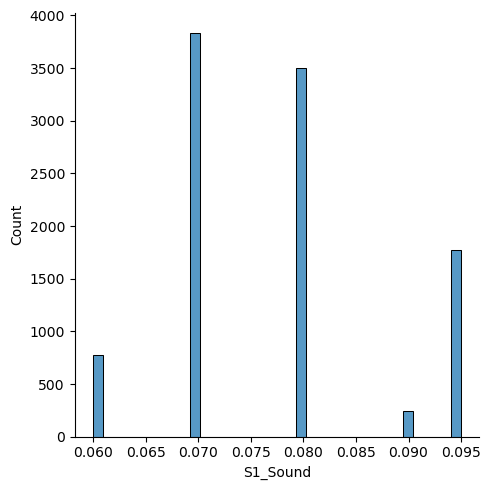

S2_Sound
0.91311532768655


<Figure size 640x480 with 0 Axes>

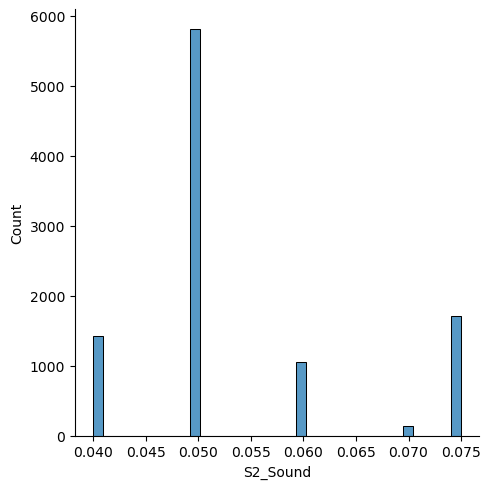

S3_Sound
0.8238343446170673


<Figure size 640x480 with 0 Axes>

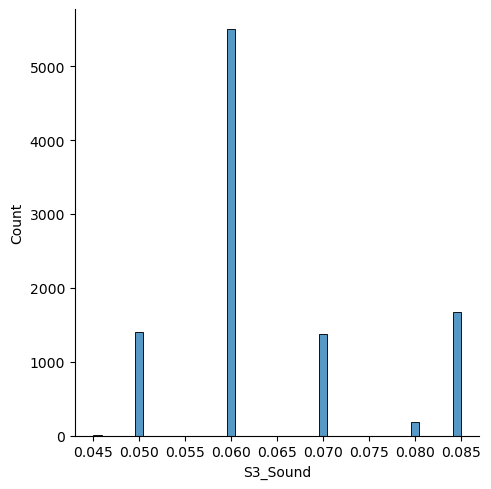

S4_Sound
1.1806779311720914


<Figure size 640x480 with 0 Axes>

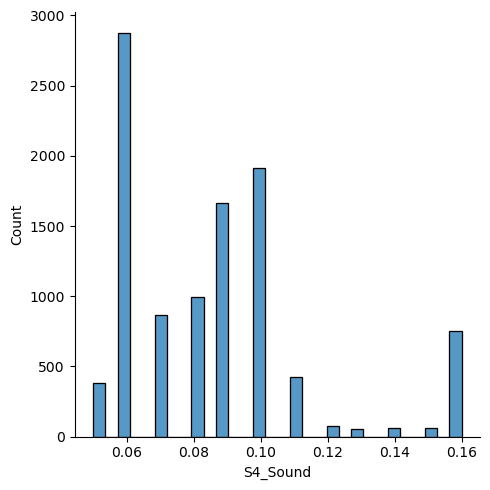

S5_CO2
1.2011120422236046


<Figure size 640x480 with 0 Axes>

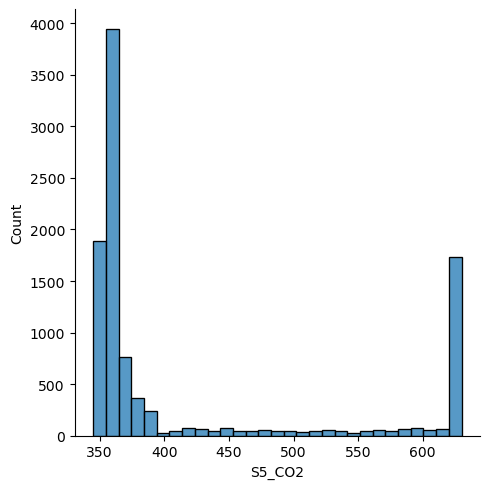

S5_CO2_Slope
-0.4623643371198591


<Figure size 640x480 with 0 Axes>

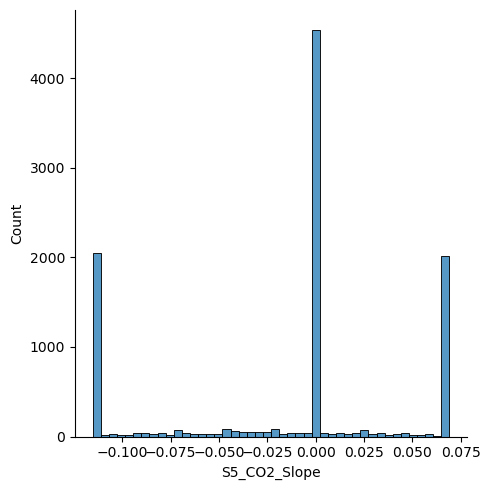

S6_PIR
nan


<Figure size 640x480 with 0 Axes>

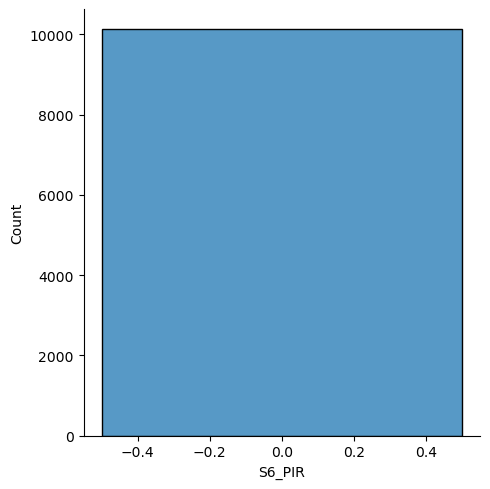

S7_PIR
nan


<Figure size 640x480 with 0 Axes>

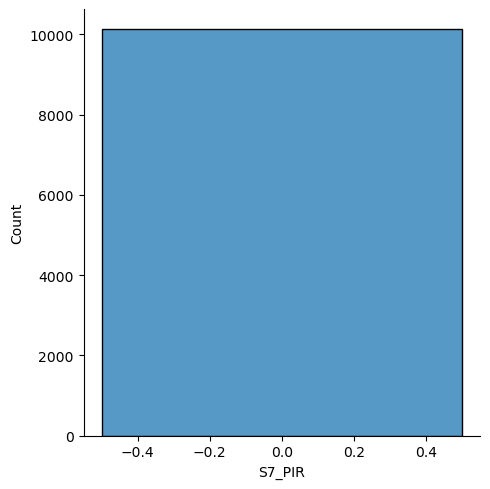

Room_Occupancy_Count
nan


<Figure size 640x480 with 0 Axes>

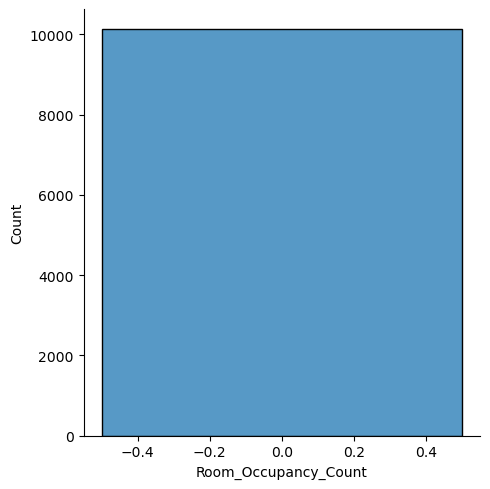

In [115]:
for col in df:
    print(col)
    print(skew(df[col]))
    plt.figure()
    sns.displot(df[col])
    plt.show()

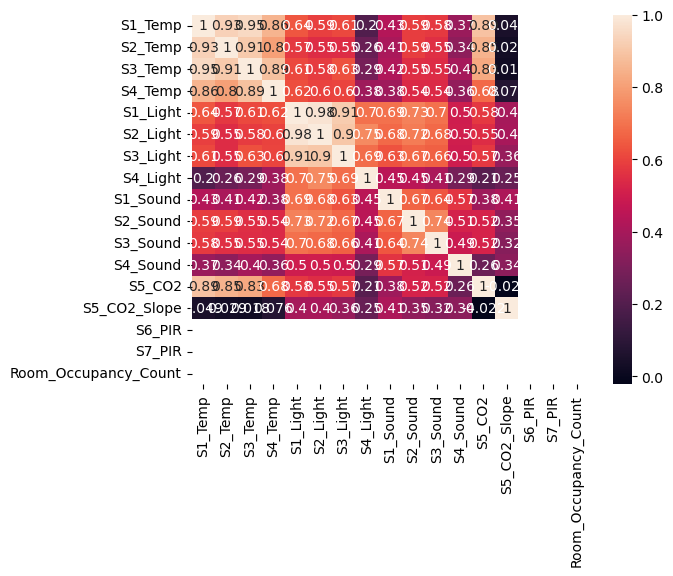

In [116]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [119]:
df1.head(3)

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,24.94,24.75,24.56,25.38,30.0,34.0,53.0,40.0,0.080,0.075,0.06,0.06,390.0,0.069231,0.0,0.0,0.0
1,24.94,24.75,24.56,25.44,30.0,33.0,53.0,40.0,0.095,0.050,0.06,0.06,390.0,0.069231,0.0,0.0,0.0
2,25.00,24.75,24.50,25.44,30.0,34.0,53.0,40.0,0.095,0.075,0.08,0.06,390.0,0.069231,0.0,0.0,0.0


## Feature selection

In [121]:
#feature selection
X= df1.drop('Room_Occupancy_Count',axis = 1)
y = df1['Room_Occupancy_Count']

In [123]:
selector = SelectKBest(score_func = f_regression)
X_new = selector.fit_transform(X,y)

In [125]:
selected_features = X.columns[selector.get_support()]
feature_score = pd.DataFrame({"features":X.columns,"score":selector.scores_}).sort_values(by = 'score',ascending = False)

In [127]:
print(feature_score)

        features  score
0        S1_Temp    0.0
1        S2_Temp    0.0
2        S3_Temp    0.0
3        S4_Temp    0.0
4       S1_Light    0.0
5       S2_Light    0.0
6       S3_Light    0.0
7       S4_Light    0.0
8       S1_Sound    0.0
9       S2_Sound    0.0
10      S3_Sound    0.0
11      S4_Sound    0.0
12        S5_CO2    0.0
13  S5_CO2_Slope    0.0
14        S6_PIR    0.0
15        S7_PIR    0.0


In [129]:
print (selected_features)

Index(['S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound',
       'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR'],
      dtype='object')


In [131]:
X_selected = X[selected_features]

In [133]:
X_selected.columns

Index(['S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound',
       'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR'],
      dtype='object')

## Train-Test split

In [136]:
X_train,X_test,y_train,y_test = train_test_split(X_selected,y,test_size=0.2,random_state=42)

In [138]:
print(X_train.shape)

(8103, 10)


In [140]:
print(X_test.shape)

(2026, 10)


In [142]:
print(y_train.shape)

(8103,)


In [144]:
print(y_test.shape)

(2026,)


## Feature scaling

In [147]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

## Building ML Model

In [150]:
models = {"Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regression": SVR()}


In [152]:
# Initialize results if not already done
results = {}  # Ensure it's defined before use

In [154]:

for model_name,model in models.items():
    #fit the model
    model.fit(X_train_scaled,y_train)
    #make the prediction
    y_pred = model.predict(X_test_scaled)
    #evaluate the model
    mse = mean_squared_error(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    #store the results
    results[model_name] = {"MSE":mse, "MAE":mae,"RMSE":rmse,"R2":r2,}

In [156]:
# Convert results to DataFrame and display
results_df = pd.DataFrame(results).T
print(results_df)

                           MSE  MAE  RMSE   R2
Linear Regression          0.0  0.0   0.0  1.0
Decision Tree              0.0  0.0   0.0  1.0
Random Forest              0.0  0.0   0.0  1.0
Gradient Boosting          0.0  0.0   0.0  1.0
Support Vector Regression  0.0  0.0   0.0  1.0


In [158]:
from sklearn.metrics import r2_score

# Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate R² Score (Training & Testing Accuracy)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training R² Score: {train_r2:.4f}")
print(f"Testing R² Score: {test_r2:.4f}")


Training R² Score: 1.0000
Testing R² Score: 1.0000


In [160]:
y_pred_dt = model.predict(X_test_scaled)
pred_train = model.predict(X_train_scaled)

In [162]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
print("accuracy score on test data",accuracy_score(y_test,y_pred))
print ("accuracy score on training data",accuracy_score(y_train,pred_train))

accuracy score on test data 1.0
accuracy score on training data 1.0


In [164]:
accuracy_dt = accuracy_score(y_test,y_pred_dt)
accuracy_dt

1.0

## Finding best model

In [166]:
best_model = results_df['R2'].idxmax()
print(f'The best Model based on R2 Score is:\n {best_model}')
print(results_df.loc[best_model])

The best Model based on R2 Score is:
 Linear Regression
MSE     0.0
MAE     0.0
RMSE    0.0
R2      1.0
Name: Linear Regression, dtype: float64


In [168]:
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(Ridge(), param_grid, cv=5)
ridge_grid.fit(X_train, y_train)

print(f"Best Ridge Alpha: {ridge_grid.best_params_['alpha']}")
print(f"Best Ridge R² Score: {ridge_grid.best_estimator_.score(X_test, y_test)}")

Best Ridge Alpha: 0.01
Best Ridge R² Score: 1.0
